# Data Understanding

# Inhouds opgaven data understanding

## 1. Libraries
## 2. Data Import
## 3. Globale Overzicht Data
    3.1 Eerste Overzicht
    3.2 Type Overzicht 
    3.3 Verdeling Overzicht
    3.4 Na's Overzicht
    3.5 De Meetniveau's Overzicht
    3.6 Correlatie Overzicht 
    3.7 Conclusie Globale Overzicht
## 4. Kolommen Redundantie Onderzoek
    4.1 Redundante Kolommen
    4.2 Datatime Kolommen
    4.3 Business Understanding Toepassing
    4.4 Duplicaten rijen
    4.5 Dtype Kolommen
    4.6 Bijvoegen kollommen 
    4.7 Na Kolommen
    
## 5. Target variabele: Functie hersteltijd
    5.1 Overzicht functie hersteltijd duur
    5.2 Verdeling functie hersteltijd duur
## 6. Feature variabele Discrete en Continu
    6.1 Overzicht discreete en ratio feature variabele
    6.2 Functie herstel prognose 
    6.3 Melding melding gebeld

## 7. Feature variabele Nominaal
    7.1 Overzicht Nominaal variabele
    7.2 Oorzaak groep
    7.3 Oorzaak code
    7.4 Equipment nummer
    7.5 Equipment soort
    7.6 Prioriteit
    7.7 Techniek melding
    7.8 Mee genomen features


## 1. Libraries

Importeren van de benodigde libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from category_encoders import LeaveOneOutEncoder
warnings.simplefilter(action='ignore', category=FutureWarning)

## 2. Data Import

Hieronder importeren we het CSV bestand. We hebben alle kolommen die in de geleverde data dictionary als NVT aangemerkt zijn weggelaten doormiddel van een Exclusion List. Dit scheelt een hele hoop memory en zorgt dat we de gehele datset kunnen importeren zonder tegen memory issues aan te lopen. 

In [113]:
cols = list(pd.read_csv("sap_storing_data_hu_project.csv", nrows =1))
exclusion_list = ['stm_sap_mon_meld_ddt', 'stm_mon_begin_ddt','stm_mon_toelichting_trdl','stm_oh_pg_mld', 'stm_scenario_mon','stm_mon_nr_status_omschr', 'stm_mon_nr__statuscode', 'stm_mon_nr_status_wijzdd', 'stm_objectdl_code_gst', 'stm_objectdl_groep_gst','stm_progfh_in_ddt','stm_progfh_in_invoer_ddt','stm_progfh_gw_ddt','stm_progfh_gw_lwd_ddt','stm_progfh_hz','stm_veroorz_groep','stm_veroorz_code','stm_veroorz_tekst_kort','stm_effect', 'stm_afspr_aanvangddt','stm_mon_eind_ddt','stm_mon_vhdsincident','stm_dir_betrok_tr','stm_aangelegd_dd','stm_aangelegd_tijd','stm_mon_begindatum','stm_mon_begintijd','stm_progfh_gw_datum','stm_progfh_gw_lwd_datum','stm_progfh_gw_lwd_tijd','stm_progfh_gw_duur','stm_afspr_aanvangdd','stm_afspr_aanvangtijd','stm_afspr_aanvangtijd','stm_mon_eind_tijd','stm_controle_dd','stm_akkoord_mon_toewijz','stm_status_sapnaarmon','stm_fact_jn','stm_akkoord_melding_jn','stm_afsluit_ddt','stm_afsluit_dd','stm_afsluit_tijd','stm_rec_toegev_ddt','stm_hinderwaarde','stm_actie','stm_standplaats','stm_status_gebr','stm_wbi_nummer','stm_projnr','stm_historie_toelichting','stm_schade_verhaalb_jn','stm_schadenr','stm_schade_status_ga','stm_schade_statusdatum','stm_relatiervo_vorig','stm_relatiervo_volgend','stm_relatiervo','stm_afspr_func_hersteldd','stm_afspr_func_hersteltijd','stm_sorteerveld','stm_rapportage_maand','stm_rapportage_jaar','stm_x_bron_publ_dt','stm_x_bron_bestandsnaam','stm_x_bron_arch_dt','stm_x_actueel_ind','stm_x_run_id','stm_x_bk','stm_x_start_sessie_dt','stm_x_vervallen_ind']
table = pd.read_csv('sap_storing_data_hu_project.csv', low_memory=False, usecols=[i for i in cols if i not in exclusion_list])
table.columns

Index(['Unnamed: 0', '#stm_sap_meldnr', 'stm_mon_nr', 'stm_vl_post',
       'stm_sap_meld_ddt', 'stm_sap_meldtekst_lang', 'stm_sap_meldtekst',
       'stm_geo_mld', 'stm_geo_mld_uit_functiepl', 'stm_equipm_nr_mld',
       'stm_equipm_soort_mld', 'stm_equipm_omschr_mld', 'stm_km_van_mld',
       'stm_km_tot_mld', 'stm_prioriteit', 'stm_status_melding_sap',
       'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_oh_pg_gst', 'stm_geo_gst',
       'stm_geo_gst_uit_functiepl', 'stm_equipm_nr_gst',
       'stm_equipm_soort_gst', 'stm_equipm_omschr_gst', 'stm_km_van_gst',
       'stm_km_tot_gst', 'stm_oorz_groep', 'stm_oorz_code', 'stm_oorz_tkst',
       'stm_fh_ddt', 'stm_fh_status', 'stm_sap_storeind_ddt',
       'stm_tao_indicator', 'stm_tao_indicator_vorige',
       'stm_tao_soort_mutatie', 'stm_tao_telling_mutatie',
       'stm_tao_beinvloedbaar_indicator', 'stm_evb', 'stm_sap_melddatum',
       'stm_sap_meldtijd', 'stm_contractgeb_mld', 'stm_functiepl_mld',
       'stm_techn_mld', 'stm_contra

Hier boven zijn de kolommen te zien waar we verder onderzoek naar gaan doen. Op eerste gezicht is er in de benaming all te zien dat er kollom tussen zullen zitten die niet relevant zijn voor het onderzoek neem bijvoorbeeld 'stm_sap_meldtekst_lang' en'stm_sap_meldtekst'.

In [114]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

 We passen de settings aan zodat alle colomen en meer rows getoond worden.

## 3. Globale Overzicht Data 

#### 3.1 Eerste Overzicht

We gaan hier eerst kijken naar het globale overzicht van de data. Op eerste gezicht lijken een paar tabellen zeer op elkaar, qua benaming en waardes. Neem 'stm_geo_mld' en 'stm_geo_mld_uit_functiepl' als voorbeeld waarin te zien is dat ze de zelfde waardes hebben. We gaan dit later verder ontleden, op deze manier kunnen we redundantie en memory gebruik zo laag mogelijk houden en krijgen we een beter overzicht van de data.

In [115]:
table.head(5)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,0,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,50053211,0.0,NaN,02/01/2006 09:00:00,Logboeknr Geeltje : 49 Tijd: 0900 VL-Po...,Logboeknr Geeltje : 49 Tijd: 0900,624.0,624.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 09:00:00,NaN,81S,624.0,624.0,NaN,NaN,NaN,0.0,0.0,ONR-RIB,133.0,Papieren ontbreken,02/01/2006 09:00:00,4.0,02/01/2006 09:00:00,N,NaN,NaN,0,B,"0,00",02/01/2006,09:00:00,NaN,624,NaN,81.0,624,S,02/01/2006,09:00:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,09:00:00,0.0,99999999.0,02/01/2006,09:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2,50053213,48.0,GN,02/01/2006 12:35:00,Logboeknr RBV : 48 Tijd: 1235 VL-Post: ...,Logboeknr RBV : 48 Tijd: 1235 VL-P,201.0,201.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,NaN,37B,201.0,201.0,NaN,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,NaN,02/01/2006 13:26:00,4.0,02/01/2006 13:26:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,12:35:00,NaN,201,NaN,37.0,201,B,02/01/2006,12:35:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,13:26:00,51.0,99999999.0,02/01/2006,13:26:00,NaN,schapen op de spoorbaan!,NaN,NaN,Lp,Apg
3,3,50053214,72.0,ZL,02/01/2006 16:40:00,Logboeknr RBV : 72 Tijd: 1640 VL-Post: ...,Logboeknr RBV : 72 Tijd: 1640 VL-P,25.0,25.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,NaN,32B,25.0,25.0,NaN,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 17:20:00,4.0,02/01/2006 17:20:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,16:40:00,NaN,025,NaN,32.0,025,B,02/01/2006,16:40:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,17:20:00,40.0,99999999.0,02/01/2006,17:20:00,NaN,Persoon langs de baan,NaN,NaN,Hgl,NaN
4,4,50053215,96.0,ZL,02/01/2006 22:30:00,Logboeknr RBV : 96 Tijd: 2230 VL-Post: ...,Logboeknr RBV : 96 Tijd: 2230 VL-P,12.0,12.0,NaN,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,NaN,35B,12.0,12.0,NaN,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,NaN,02/01/2006 22:36:00,4.0,02/01/2006 22:36:00,N,NaN,NaN,0,NB,"0,00",02/01/2006,22:30:00,NaN,012,NaN,35.0,012,B,02/01/2006,22:30:00,NaN,00:00:00,99999999.0,NaN,00:00:00,NaN,00:00:00,99999999.0,00:00:00,0.0,02/01/2006,22:36:00,6.0,99999999.0,02/01/2006,22:36:00,NaN,Bijna aanrijding met persoon,NaN,NaN,Hgv,NaN


#### 3.2 Type Overzicht

Als we kijken naar wat voor waardes er in onze dataset zitten zien we opvallend veel 'objects'. Als we kijken naar de benaming van veel van deze 'objects' zien we dat ze te maken hebben met datum of tijd. Dit verklaart waarom ze niet als een float of integer worden gezien. Later gaan wij deze waardes omzetten naar hun echte waardes, zodat we met ze kunnen werken.

In [116]:
table.dtypes

Unnamed: 0              object
#stm_sap_meldnr          int64
stm_mon_nr             float64
stm_vl_post             object
stm_sap_meld_ddt        object
                        ...   
stm_oorz_tekst_kort     object
stm_pplg_van            object
stm_pplg_naar           object
stm_dstrglp_van         object
stm_dstrglp_naar        object
Length: 70, dtype: object

#### 3.3 Verdeling Overzicht

Hier onder gaan we kijken of er op eerste gezicht verdeling te bepalen zijn. Er valt op dat veel kolommen hoge waardes hebben.  Hieruit kunnen we concluderen dat de data of veel uitschieters bevatten of geen kwantitatieve waardes zijn.

In [117]:
table.describe()

,#stm_sap_meldnr,stm_mon_nr,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_code,stm_fh_status,stm_tao_telling_mutatie,stm_contractgeb_mld,stm_contractgeb_gst,stm_arbeid,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
count,8.985260e+05,8.985250e+05,884926.000000,6.611260e+05,8.985220e+05,8.985220e+05,898365.000000,741568.000000,6.057210e+05,8.985210e+05,8.985210e+05,845113.000000,747318.000000,898526.000000,661017.000000,898303.000000,8.984880e+05,898488.000000,898488.000000,8.984880e+05
mean,7.510690e+07,9.163174e+05,335.005622,1.064512e+07,3.536605e+04,1.594005e+04,4.582593,321.455539,1.062666e+07,2.664714e+04,1.245256e+04,193.577248,1.802484,0.143858,25.261916,25.117415,3.976436e+06,0.201329,923.148771,8.845657e+07
std,1.113009e+07,1.588361e+06,274.906052,4.748398e+05,2.294758e+05,4.969935e+04,2.262522,270.687469,4.755891e+05,7.841763e+04,6.410697e+04,48.310779,1.182432,0.373983,19.725904,19.444268,1.990988e+07,0.498747,6404.546787,2.712747e+08
min,0.000000e+00,0.000000e+00,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000001e+07,0.000000e+00,0.000000e+00,33.000000,1.000000,-1.000000,0.000000,0.000000,-1.167950e+05,0.000000,0.000000,0.000000e+00
25%,8.035472e+07,0.000000e+00,85.000000,1.022028e+07,0.000000e+00,0.000000e+00,2.000000,79.000000,1.021172e+07,0.000000e+00,0.000000e+00,144.000000,1.000000,0.000000,9.000000,9.000000,0.000000e+00,0.000000,11.000000,1.800000e+01
50%,8.063615e+07,0.000000e+00,208.000000,1.059635e+07,1.702900e+04,0.000000e+00,4.000000,203.000000,1.056452e+07,5.000000e+03,0.000000e+00,213.000000,1.000000,0.000000,22.000000,23.000000,3.000000e+00,0.000000,84.000000,6.700000e+01
75%,8.079029e+07,1.404624e+06,551.000000,1.095769e+07,4.463000e+04,1.514200e+04,5.000000,545.000000,1.092778e+07,3.751500e+04,0.000000e+00,221.000000,2.000000,0.000000,33.000000,32.000000,4.700000e+01,0.000000,256.000000,1.318000e+03
max,1.000000e+08,5.748960e+06,952.000000,3.039590e+07,6.084449e+07,4.221399e+06,9.000000,952.000000,3.039590e+07,3.096056e+07,3.096056e+07,999.000000,9.000000,1.000000,99.000000,99.000000,1.057679e+09,150.000000,528297.000000,1.060469e+09


#### 3.4 Na's Overzicht

Hieronder bekijken we de NA's waardes. Zoals we kunnen zien zijn er bij de meeste tabellen vrij veel NA's waardes. En er zijn sommige die er minder dan 10 hebben, wat opvalt is dat dit tabellen zijn die met afstanden zoals km te maken hebben. Wat ook opmerkelijk is dat de tabellen gerelateerd aan tijd en/of datum 38 NA's hebben. 

In [118]:
table.isna().sum()

Unnamed: 0                  0
#stm_sap_meldnr             0
stm_mon_nr                  1
stm_vl_post            588027
stm_sap_meld_ddt            1
                        ...  
stm_oorz_tekst_kort    509896
stm_pplg_van           643777
stm_pplg_naar          838138
stm_dstrglp_van        589042
stm_dstrglp_naar       532766
Length: 70, dtype: int64

We gaan kijken of we kunnen achterhalen waarom bepaalde kolommen hoge aantal Na's waardes hebben in vergelijking tot de andere kolommen. 

In [119]:
table['stm_km_van_gst'].sort_values()

1         0.0
470413    0.0
470412    0.0
470409    0.0
470402    0.0
         ... 
0         NaN
261492    NaN
896775    NaN
896793    NaN
898179    NaN
Name: stm_km_van_gst, Length: 898526, dtype: float64

De rede dat er zo weinig Na's waardes zitten in de tabellen is omdat ze worden ingevuld met '0.0'. We kijken of de hoeveelheid 0's ongeveer overheen komt met het gemiddelde aantal NA's als in de andere tabellen.

In [120]:
print('NaN mean:', table.isna().sum().mean())
print(table['stm_km_van_gst'].value_counts())

NaN mean: 147618.1857142857
0.0        397523
80140.0      4175
34930.0      3127
84200.0      2827
80780.0      2676
            ...  
18047.0         1
69652.0         1
89503.0         1
28740.0         1
40350.0         1
Name: stm_km_van_gst, Length: 35335, dtype: int64


In [121]:
print(table['stm_fh_duur'].value_counts())

0.0        171713
5.0          6825
3.0          6389
6.0          5599
7.0          5389
            ...  
32622.0         1
6503.0          1
43224.0         1
7620.0          1
22630.0         1
Name: stm_fh_duur, Length: 16930, dtype: int64


Hieruit kunnen we zien dat een groot deel van de data opgevuld is met 0 wat later geïnterpreteerd kan worden als NaN waardes. Verder kunnen we hier onder zien dat er geen een kolommen zijn is waar 0 waarde niet missen.

In [122]:
table.dropna()

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar


#### 3.5 De Meetniveau's Overzicht

We gaan hier onder bepalen wat de meetwaardes zijn voor iedere kolom.

In [123]:
table.sample(3)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
587247,594378,80747199,0.0,NaN,18/12/2013 14:14:00,Ehv : Sp-165/21 looppad slecht met gaten erin.,Ehv : Sp-165/21 looppad slecht met gaten,618,618.0,10892822.0,TERREIN,Terrein,49300.0,0.0,4.0,MAFS,18/12/2013 14:14:00,19/12/2013 09:15:00,24B,618.0,618.0,10892822.0,TERREIN,Terrein,49300.0,0.0,TECHONV,221.0,Gestoord object: BAANLICHAAM 618. Gestoord on...,19/12/2013 10:15:00,2.0,14/01/2014 16:00:00,N,N,NaN,0,B,"0,00",18/12/2013,14:14:00,24.0,618-206-1000046395,B,24.0,618-206-1000046395,B,18/12/2013,14:14:00,19/12/2013,09:15:00,60.0,19/12/2013,10:30:00,19/12/2013,12:36:49,75,00:00:00,0.0,19/12/2013,10:15:00,1201.0,1.141000e+03,14/01/2014,16:00:00,NaN,NaN,NaN,NaN,NaN,00/00/0000
494741,501526,80693685,0.0,NaN,26/11/2012 16:05:00,Wld-Ddr : P-614 groen gedoofd,Wld-Ddr : P-614 groen gedoofd,119,119.0,10035553.0,SEIN,P-sein 614 Zlw-Drd,23123.0,0.0,5.0,MINB,26/11/2012 16:07:00,26/11/2012 23:30:00,05S,NaN,NaN,NaN,NaN,NaN,0.0,0.0,TECHONV,215.0,Gestoord object: SEIN 614. Gestoord onderdeel...,27/11/2012 00:30:00,3.0,27/11/2012 12:26:00,N,NaN,NaN,0,B,"0,00",26/11/2012,16:05:00,5.0,119-603-1000015805,S,5.0,NaN,S,26/11/2012,16:07:00,26/11/2012,23:30:00,60.0,27/11/2012,00:30:00,27/11/2012,00:41:46,60,00:00:00,0.0,27/11/2012,00:30:00,503.0,4.430000e+02,27/11/2012,12:26:00,NaN,NaN,NaN,NaN,NaN,NaN
815523,824648,80873642,0.0,NaN,13/12/2016 18:51:56,Ut : info+ 15503 en 15504 gestoord,Ut : info+ 15503 en 15504 gestoord,531,531.0,11554779.0,VISUELERIS,Ut TB-3-hal-10(15503-15504-15505),35100.0,35100.0,4.0,MINB,13/12/2016 18:51:56,13/12/2016 18:52:34,51T,531,531.0,11554779.0,VISUELERIS,Ut TB-3-hal-10(15503-15504-15505),35100.0,35100.0,TECHONV,221.0,Borden zijn nog niet in gebruik. ( staan Borde...,13/12/2016 18:57:32,1.0,13/12/2016 19:00:50,N,NaN,NaN,0,B,"0,00",13/12/2016,18:51:56,51.0,531-808-1000134856,T,51.0,531-808-1000134856,T,13/12/2016,18:51:56,13/12/2016,18:52:34,0.0,NaN,00:00:00,NaN,00:00:00,0,00:00:00,0.0,13/12/2016,18:57:32,6.0,1.060290e+09,13/12/2016,19:00:50,NaN,Borden zijn nog niet in gebruik. ( staan,NaN,NaN,NaN,NaN


We gaan hier de meetniveau ‘s van de variabelen bepalen op inzicht van de data hier boven met bussnins understanding.

- Nominaal: Unnamed, stm_sap_meldnr, stm_mon_nr, stm_vl_post, stm_sap_meldtekst_lang, stm_sap_meldtekst, stm_geo_mld, stm_geo_mld_uit_functiepl, stm_equipm_nr_mld, stm_equipm_soort_mld, stm_equipm_omschr_mld, stm_prioriteit, stm_status_melding_sap, stm_oh_pg_gst, stm_geo_gst, stm_geo_gst_uit_functiepl, stm_equipm_nr_gst, stm_equipm_soort_gst, stm_equipm_omschr_gst, stm_oorz_groep, stm_oorz_code, stm_oorz_tkst, stm_fh_status, stm_tao_indicator, stm_tao_indicator_vorige, stm_tao_soort_mutatie, stm_contractgeb_mld, stm_arbeid, stm_functiepl_mld, stm_techn_mld, stm_contractgeb_gst, stm_functiepl_gst, stm_functiepl_gst, stm_techn_gst, stm_arbeid, stm_oorz_tekst_kort, stm_pplg_van, stm_pplg_naar, stm_dstrglp_van, stm_dstrglp_naar, stm_tao_beinvloedbaar_indicator

- Ordinaal: -

- Discreet: stm_sap_melddatum, stm_sap_meld_ddt, stm_aanngeb_ddt, stm_aanntpl_ddt, stm_tao_telling_mutatie, stm_sap_meld_ddt, stm_sap_storeind_ddt, stm_sap_meldtijd, stm_aanngeb_tijd, stm_aanngeb_dd, stm_aanntpl_dd, stm_aanntpl_tijd, stm_progfh_in_datum, stm_progfh_in_tijd, stm_progfh_in_invoer_dat, stm_progfh_in_invoer_tijd, stm_progfh_gw_tijd, stm_progfh_gw_teller, stm_fh_dd, stm_fh_tijd, stm_sap_storeinddatum, stm_sap_storeindtijd, stm_mon_eind_datum, stm_fh_ddt

- Continu: stm_km_van_mld, stm_km_tot_mld, stm_km_van_gst, stm_km_tot_gst, stm_evb, stm_fh_duur, stm_reactie_duur, stm_progfh_in_duur	

#### 3.6 Correlatie Overzicht 

Voor de kolommen waar het van toepassing is gaan we kijken of we een correlatie kunnen vinden. 

<AxesSubplot:>

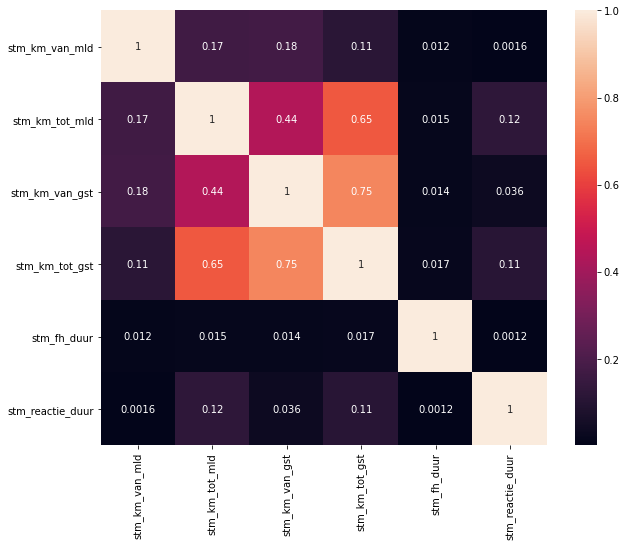

In [124]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(table[['stm_km_van_mld', 'stm_km_tot_mld', 'stm_km_van_gst', 'stm_km_tot_gst', 'stm_fh_duur', 'stm_evb', 'stm_reactie_duur', 'stm_progfh_in_duur']].corr(), annot=True, ax=ax)

Op eerste gezicht kunnen we geen corrolatie vinden van boven de 1.7 %

#### 3.7 Conclusie Globale Overzicht

Op eerste gezicht is er te zien dat we hier te maken hebben met veel Kwalitatieve (nominale) waardes. Daarnaast hebben de continue waardes die er zijn weinig correlatie met elkaar. Er zal verder onderzoek gedaan moeten worden in de nominale kolommen om er achter te komen of ze van belang zijn.  

## 4. Kolommen Redundantie Onderzoek

In dit hoofstuk gaan we kijken naar de verschillende kolommen en de duplicaten of redundante informatie. Hier door kunnen we een beter overzicht krijgen over de data die er beschikbaar is.

#### 4.1 Redundante Kolommen 

Hier onder nemen we een kijk of er op eerst oogopslag redundante kolommen aanwezig zijn. Dit wordt gedaan om de memory verbruik te verminderen en een beter overzicht te krijgen van de data.

In [125]:
table.sample(4)

,Unnamed: 0,#stm_sap_meldnr,stm_mon_nr,stm_vl_post,stm_sap_meld_ddt,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_equipm_omschr_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_geo_gst_uit_functiepl,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_equipm_omschr_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_oorz_tkst,stm_fh_ddt,stm_fh_status,stm_sap_storeind_ddt,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_evb,stm_sap_melddatum,stm_sap_meldtijd,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_functiepl_gst,stm_techn_gst,stm_aanngeb_dd,stm_aanngeb_tijd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_arbeid,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_in_duur,stm_progfh_gw_tijd,stm_progfh_gw_teller,stm_fh_dd,stm_fh_tijd,stm_fh_duur,stm_reactie_duur,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_oorz_tekst_kort,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
797153,806065,80863879,0.0,NaN,22/09/2016 21:52:07,Asn : Sp-3 analoge losse klok staat stil op 8:30.,Asn : Sp-3 analoge losse klok staat stil,654,654.0,10650387.0,TIJDKLOK,Asn Uurwerk sp 3 midden,49300.0,49300.0,4.0,MINB,22/09/2016 21:52:07,22/09/2016 21:54:37,58T,654,654.0,10650387.0,TIJDKLOK,Asn Uurwerk sp 3 midden,49300.0,49300.0,TECHONV,221.0,uurwerk vervangen. uurwerk vervangen.,23/09/2016 00:20:37,1.0,23/09/2016 00:22:12,N,N,NaN,0,B,"0,00",22/09/2016,21:52:07,58.0,654-805-1000071324,T,58.0,654-805-1000071324,T,22/09/2016,21:52:07,22/09/2016,21:54:37,0.0,NaN,00:00:00,NaN,00:00:00,0,00:00:00,0.0,23/09/2016,00:20:37,148.0,1.060173e+09,23/09/2016,00:22:12,NaN,uurwerk vervangen.,NaN,NaN,NaN,NaN
520372,527242,80711346,0.0,NaN,20/03/2013 08:11:00,"Sptl : Tr 45715 (DBS) DC-trip, Zuidbuis, 07:4...","Sptl : Tr 45715 (DBS) DC-trip, Zuidbuis,",152,152.0,10966644.0,25SPANSLIN,Spsl-Sophiatunnel 2 det en best DC-zijde,3450.0,0.0,9.0,MINB,20/03/2013 08:11:00,20/03/2013 08:24:00,71E,152.0,152.0,10966644.0,25SPANSLIN,Spsl-Sophiatunnel 2 det en best DC-zijde,3450.0,0.0,TECHONV,298.0,Gestoord object: OS Sophiatunnel. Gestoord on...,20/03/2013 08:27:00,4.0,20/03/2013 08:28:00,N,N,NaN,0,B,"0,00",20/03/2013,08:11:00,71.0,152-418-1000110788,E,71.0,152-418-1000110788,E,20/03/2013,08:11:00,20/03/2013,08:24:00,3.0,20/03/2013,08:25:00,20/03/2013,08:27:00,1,00:00:00,0.0,20/03/2013,08:27:00,16.0,1.300000e+01,20/03/2013,08:28:00,NaN,NaN,NaN,NaN,NaN,00/00/0000
545251,552198,80723671,2050544.0,ZL,24/06/2013 04:57:00,Es-Gronau : Ovw 53.6 / 53.8 / 54.1 / 56.9 en ...,Es-Gronau : Ovw 53.6 / 53.8 / 54.1 / 56.,28,28.0,10211748.0,OVERWEG,Ahob 53.6 Hengelosestraat Hgl-Esg/Es,53673.0,0.0,2.0,MAFS,24/06/2013 04:58:00,24/06/2013 05:15:00,32S,28.0,28.0,10211748.0,OVERWEG,Ahob 53.6 Hengelosestraat Hgl-Esg/Es,53673.0,0.0,TECHONV,218.0,05:35: Gecontroleerd in RH Es en hier alles i...,24/06/2013 11:03:00,1.0,24/06/2013 11:11:00,N,N,NaN,0,B,"0,00",24/06/2013,04:57:00,32.0,028-204-1000137404,S,32.0,028-204-1000137404,S,24/06/2013,04:58:00,24/06/2013,05:15:00,348.0,24/06/2013,11:05:00,24/06/2013,12:47:33,350,00:00:00,0.0,24/06/2013,11:03:00,365.0,1.700000e+01,24/06/2013,11:11:00,24/06/2013,Status gewijzigd van Concept naar Compl,NaN,ES,ESE,00/00/0000
683423,691171,80796812,0.0,NaN,17/02/2015 09:08:00,Bdm : S-70 is rd gedoofd,Bdm : S-70 is rd gedoofd,201,201.0,10221634.0,SEIN,Sein 70 Swd-Dz,15241.0,0.0,2.0,MAFS,17/02/2015 09:08:00,17/02/2015 09:47:00,37S,201,201.0,10221634.0,SEIN,Sein 70 Swd-Dz,15241.0,0.0,TECHONV,225.0,Gestoord object: SEIN 70. Gestoord onderdeel:...,17/02/2015 10:07:00,1.0,17/02/2015 10:08:00,N,N,NaN,0,B,"0,00",17/02/2015,09:08:00,37.0,201-603-1000026134,S,37.0,201-603-1000026134,S,17/02/2015,09:08:00,17/02/2015,09:47:00,20.0,17/02/2015,10:17:00,17/02/2

We kunnen zien dat de tekst en omschrijving kolommen te veel van elkaar afwijken en niet gebruikt zouden kunnen worden voor predictie modellen. Ook zijn er een aantal rijen met duplicate informatie zoals 'Unnamed: 0' is reduantant het is het index nummer van de rijen.

In [126]:
table[['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_functiepl_gst', 'stm_geo_gst_uit_functiepl', 'stm_arbeid', 'stm_evb']].sample(3)

,stm_sap_meldtekst_lang,stm_sap_meldtekst,stm_oorz_tkst,stm_oorz_tekst_kort,stm_equipm_omschr_mld,stm_equipm_omschr_gst,Unnamed: 0,stm_functiepl_gst,stm_geo_gst_uit_functiepl,stm_arbeid,stm_evb
218621,Btl-Vga : Achter S-1102 t.o.b.s.[ANALYSE-3/2m...,Btl-Vga : Achter S-1102 t.o.b.s.[ANALYSE,Gestoord object GEO code : 053 Gestoord objec...,b.o.i.o. Gecontroleerd en getest.,GRS SSL Vga-Btl,NaN,224555,NaN,NaN,-358.0,"0,60"
140985,[2+] Rsd-Rsd : Wl-153 A n.i.c. ll,[2+] Rsd-Rsd : Wl-153 A n.i.c. ll,met 4 minuten regeling mewt brander het wisse...,NaN,545 Rsd hl engels wl 151B/153A,545 Rsd hl engels wl 151B/153A,145647,545-302-1000090241,545.0,0.0,"0,00"
817138,Zl : Spijl van hekwerk manco thv busopstelterr...,Zl : Spijl van hekwerk manco thv busopst,NaN,NaN,Afscherming Hea,Afscherming Hea,826273,603-205-1000014326,603.0,0.0,"0,00"


Voor verder onderzoek verwijderen we hier onder de redundante tekst kollommen

In [127]:
table = table.drop(['stm_sap_meldtekst_lang', 'stm_sap_meldtekst', 'stm_oorz_tkst', 'stm_oorz_tekst_kort', 'stm_equipm_omschr_mld', 'stm_equipm_omschr_gst', 'Unnamed: 0', 'stm_geo_gst_uit_functiepl', 'stm_functiepl_gst', 'stm_arbeid', 'stm_evb'], axis=1)

#### 4.2 Datatime Kolommen

Eerst gaan we kijken naar de verschillende data en time kolommen. Hier onder is er te zien dat veel kolommen informatie is die in andere kolommen verwerkt is zoals 'stm_sap_meld_ddt' en stm_sap_melddatum. 

In [128]:
table[['stm_sap_melddatum', 'stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum', 'stm_fh_ddt']].sample(3)

,stm_sap_melddatum,stm_sap_meld_ddt,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_sap_storeind_ddt,stm_sap_meldtijd,stm_aanngeb_tijd,stm_aanngeb_dd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_gw_tijd,stm_fh_dd,stm_fh_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum,stm_fh_ddt
718665,28/09/2015,28/09/2015 22:30:02,28/09/2015 22:30:04,NaN,28/09/2015 23:52:00,22:30:02,22:30:04,28/09/2015,NaN,00:00:00,NaN,00:00:00,NaN,00:00:00,00:00:00,28/09/2015,23:15:00,28/09/2015,23:52:00,NaN,28/09/2015 23:15:00
442881,10/08/2011,10/08/2011 11:03:00,10/08/2011 11:03:00,10/08/2011 12:07:00,10/08/2011 13:44:00,11:03:00,11:03:00,10/08/2011,10/08/2011,12:07:00,10/08/2011,13:08:00,10/08/2011,12:08:46,00:00:00,10/08/2011,13:18:00,10/08/2011,13:44:00,NaN,10/08/2011 13:18:00
286611,08/11/2007,08/11/2007 11:47:00,08/11/2007 11:52:00,08/11/2007 13:15:00,15/08/2008 09:36:00,11:47:00,11:52:00,08/11/2007,08/11/2007,13:15:00,08/11/2007,16:00:00,08/11/2007,15:59:17,00:00:00,15/08/2008,09:36:00,15/08/2008,09:36:00,NaN,15/08/2008 09:36:00


Hier onder worden de kolommen die zullen worden verwijdert getoond. Deze kolommen zijn duplicaten van informatie ook worden twee anderen kolommen verwijdert stm_sap_storeind_ddt en stm_sap_meld_ddt. Deze kolommen zijn niet relevant omdat ze na de gewenste predictie tijd plaats vinden.

In [129]:
table[['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd','stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum']].sample(3)

,stm_sap_melddatum,stm_sap_storeind_ddt,stm_sap_meldtijd,stm_aanngeb_tijd,stm_aanngeb_dd,stm_aanntpl_dd,stm_aanntpl_tijd,stm_progfh_in_datum,stm_progfh_in_tijd,stm_progfh_in_invoer_dat,stm_progfh_in_invoer_tijd,stm_progfh_gw_tijd,stm_fh_dd,stm_fh_tijd,stm_sap_storeinddatum,stm_sap_storeindtijd,stm_mon_eind_datum
704608,03/07/2015,03/07/2015 07:41:00,06:10:00,06:10:00,03/07/2015,03/07/2015,07:01:00,03/07/2015,08:02:00,03/07/2015,07:02:43,00:00:00,03/07/2015,07:40:00,03/07/2015,07:41:00,NaN
233907,05/07/2006,05/07/2006 23:00:00,22:08:00,22:10:00,05/07/2006,05/07/2006,22:45:00,05/07/2006,23:00:00,05/07/2006,23:08:19,00:00:00,05/07/2006,23:00:00,05/07/2006,23:00:00,05/07/2006
813537,02/12/2016,NaN,22:58:15,22:58:15,02/12/2016,03/12/2016,00:17:00,03/12/2016,04:19:00,20161203,04:19:47,00:00:00,03/12/2016,04:19:00,NaN,00:00:00,03/12/2016


We halen voor verder onderzoek de duplicaten kolommen uit de dataset

In [130]:
table = table.drop(['stm_sap_melddatum', 'stm_sap_storeind_ddt', 'stm_sap_meldtijd', 'stm_aanngeb_tijd', 'stm_aanngeb_dd', 'stm_aanntpl_dd', 'stm_aanntpl_tijd', 'stm_progfh_in_datum', 'stm_progfh_in_tijd', 'stm_progfh_in_invoer_dat', 'stm_progfh_in_invoer_tijd', 'stm_progfh_gw_tijd', 'stm_fh_dd', 'stm_fh_tijd', 'stm_sap_storeinddatum', 'stm_sap_storeindtijd', 'stm_mon_eind_datum'], axis=1)

In [131]:
table[['stm_sap_meld_ddt', 'stm_aanngeb_ddt', 'stm_aanntpl_ddt', 'stm_fh_ddt']].sample(3)

,stm_sap_meld_ddt,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_fh_ddt
709464,30/07/2015 15:00:00,30/07/2015 15:00:00,NaN,30/07/2015 15:33:00
28827,01/11/2011 17:58:00,02/11/2011 05:01:00,NaN,NaN
95180,09/07/2016 13:38:00,09/07/2016 13:38:00,NaN,NaN


Hier boven zien we de vier datetime colomen die we mee gaan nemen. 

#### 4.3 Business Understanding Toepassing

Voor de gewenste predictie is het van belang dat we de rijen en kolommen gebruiken die van belang zijn voor het model. Voor het voospellen van kortere storingen zijn rijen boven de 10 uur niet van belang. Hieronder halen we alle waardes uit de tabel waarbij het functieherstel langer dan 10 uur duren.

In [132]:
table = table[table['stm_fh_duur'] <= 600]

We kunnen ook de storingen die minder dan 0 minuten duren verwijderen omdat een voorspelling voor die storingen niet relevant is. Daarnaast is er hieronder ook te zien dat storingen van 0 minuut een prognose hebben van 0 of 999999 minuten.

In [133]:
table[table['stm_fh_duur'] <= 0].filter(like='duur').sample(3)

,stm_progfh_in_duur,stm_fh_duur,stm_reactie_duur
45313,99999999,0.0,99999999.0
65340,99999999,0.0,99999999.0
83654,0,0.0,0.0


Voor verder onderzoek wordt hier onder de row van functie herstel duur onder de 0 minuut verwijdert

In [134]:
table = table[table['stm_fh_duur'] > 0]

Verder zijn er een aantal kolommen niet relevant voor het huidige onderzoek. Zoals de betrokken VL post, monitoringsnummer. Deze halen we voor verder onderzoek uit consideratie en de dataset.

In [135]:
table[['stm_vl_post', 'stm_mon_nr']].sample(3)

,stm_vl_post,stm_mon_nr
506649,NaN,0.0
773099,NaN,0.0
280611,NaN,0.0


In [136]:
table = table.drop(['stm_vl_post', 'stm_mon_nr'], axis=1)

#### 4.4 Duplicaten rijen

In de data zijn verschillende duplicaten op te merken van hetzelfde #stm_sap_meldnr, functie hersteltijd en meld datum. Er is hier onder te zien dat de kolommen met het zelfde meldt nummer alleen op PPLG, DSTR en Tao kolommen veranderen in waardes. We hebben ervoor gekozen om deze duplicaat rijen te verwijderen uit de data.

In [137]:
table[table.duplicated('#stm_sap_meldnr', keep = False)].sort_values(by=['#stm_sap_meldnr']).head(6)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_fh_ddt,stm_fh_status,stm_tao_indicator,stm_tao_indicator_vorige,stm_tao_soort_mutatie,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_pplg_van,stm_pplg_naar,stm_dstrglp_van,stm_dstrglp_naar
35216,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,11/01/2013 05:00:00,NaN,11S,541.0,NaN,NaN,13100.0,13200.0,TECHONV,221.0,11/01/2013 05:03:00,4.0,J,NaN,Nieuw,1,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0,KV,NaN,WP,VTBR
35217,50117666,10/01/2013 10:42:00,541.0,541.0,NaN,NaN,13100.0,13200.0,9.0,MAFS,11/01/2013 05:00:00,NaN,11S,541.0,NaN,NaN,13100.0,13200.0,TECHONV,221.0,11/01/2013 05:03:00,4.0,J,J,Ongewijzigd,0,B,NaN,541,NaN,11.0,S,99999999,0.0,3.0,99999999.0,NaN,WP,VTBR,00/00/0000
35407,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,15/01/2013 15:51:00,NaN,30B,507.0,10201352.0,WISSEL,93639.0,0.0,TECHONV,299.0,15/01/2013 16:16:00,1.0,J,NaN,Nieuw,1,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0,VA,NaN,AH,VA
35408,50117856,15/01/2013 15:51:00,507.0,507.0,10201352.0,WISSEL,93639.0,0.0,9.0,MAFS,15/01/2013 15:51:00,NaN,30B,507.0,10201352.0,WISSEL,93639.0,0.0,TECHONV,299.0,15/01/2013 16:16:00,1.0,J,J,Ongewijzigd,0,B,30.0,507-302-1000072761,B,30.0,B,99999999,0.0,25.0,99999999.0,NaN,AH,VA,00/00/0000
35633,50118095,25/01/2013 23:13:00,133.0,133.0,NaN,NaN,0.0,0.0,9.0,MAFS,26/01/2013 05:01:00,NaN,08B,133.0,NaN,NaN,18600.0,19100.0,ONR-DERD,142.0,26/01/2013 05:05:00,4.0,J,NaN,Nieuw,1,NB,NaN,133,NaN,8.0,B,99999999,0.0,4.0,99999999.0,HFD,NaN,HFD,SHL
35634,50118095,25/01/2013 23:13:00,133.0,133.0,NaN,NaN,0.0,0.0,9.0,MAFS,26/01/2013 05:01:00,NaN,08B,133.0,NaN,NaN,18600.0,19100.0,ONR-DERD,142.0,26/01/2013 05:05:00,4.0,J,J,Ongewijzigd,0,NB,NaN,133,NaN,8.0,B,99999999,0.0,4.0,99999999.0,NaN,HFD,SHL,00/00/0000


Voor verder onderzoek worden de duplicaten hier onder verwijdert

In [138]:
print(table.shape)
table.drop_duplicates(subset=['#stm_sap_meldnr'],inplace=True, keep='last')
print(table.shape)

(579887, 40)
(374871, 40)


#### 4.7 Na Kolommen

Hier nemen we een diepere blik in de kolommen met Na's waardes.

In [139]:
print("Totaal aantal rows:", table.shape[0])

Totaal aantal rows: 374871


Hier onder zie je een lijst met de aantal Na's per kolom.

In [140]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_pplg_naar               358974
stm_tao_soort_mutatie       312623
stm_pplg_van                302525
stm_dstrglp_van             288473
stm_dstrglp_naar            280763
stm_tao_indicator_vorige    254823
stm_equipm_soort_gst         90328
stm_equipm_nr_gst            90322
stm_contractgeb_mld          69670
stm_equipm_soort_mld         69641
dtype: int64

Gebaseerd op de aantal Na's en de totaal aantal kolommen verwijderen we de kolommen die te veel na's hebben. Deze kolommen bevatten te weinig informatie om iets relevants te zeggen over de data. Alles waar meer dan 200000 missende items in zitten verwijderen van consideratie als target of feature variablen

In [141]:
table[['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar']].sample(3)

,stm_tao_indicator_vorige,stm_pplg_naar,stm_tao_soort_mutatie,stm_pplg_van,stm_dstrglp_van,stm_dstrglp_naar
425816,NaN,NaN,NaN,NaN,NaN,NaN
577328,NaN,NaN,NaN,NaN,NaN,00/00/0000
156080,J,NaN,Ongewijzigd,VD,VD,RL


Hierboven zie je kolommen die verwijderd worden voor te veel NaN waardes. Daarnaast zeggen de kolommen van uit een business perspectief niet veel over de duur van de van functie herstel.

Hier onder halen we voor verder onderzoek de kolomen uit de de data set

In [142]:
table = table.drop(['stm_tao_indicator_vorige', 'stm_pplg_naar', 'stm_tao_soort_mutatie', 'stm_pplg_van', 'stm_dstrglp_van', 'stm_dstrglp_naar'], axis=1)

Verder kunnen we hier onder zien dat we nog een aantal na's in de data set hebben zitten. Deze gaan we met wat business understanding verwerken.

In [143]:
table.isna().sum().sort_values(ascending=False).head(10)

stm_equipm_soort_gst    90328
stm_equipm_nr_gst       90322
stm_contractgeb_mld     69670
stm_equipm_soort_mld    69641
stm_equipm_nr_mld       69639
stm_techn_mld           69198
stm_geo_gst             60964
stm_aanntpl_ddt         24420
stm_oorz_groep           6404
stm_oorz_code            6401
dtype: int64

We hebben voor de overige kolommen ervoor gekozen om de nan waardes te veranderen naar een None en 0 categorie waar dat van toepassing is. Neem stm_equipm_soort_gst, stm_equipm_soort_mld als voorbeeld: Er is niet altijd equipment nodig om een probleem op te lossen dit is geen valse data maar niet van toepassing. Dit geldt ook voor de geo locatie en soort kolommen 

In [144]:
table[table['stm_equipm_soort_mld'].isna()].head(3)

,#stm_sap_meldnr,stm_sap_meld_ddt,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_km_van_mld,stm_km_tot_mld,stm_prioriteit,stm_status_melding_sap,stm_aanngeb_ddt,stm_aanntpl_ddt,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_km_van_gst,stm_km_tot_gst,stm_oorz_groep,stm_oorz_code,stm_fh_ddt,stm_fh_status,stm_tao_indicator,stm_tao_telling_mutatie,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur
2,50053213,02/01/2006 12:35:00,201.0,201.0,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 12:35:00,NaN,37B,201.0,NaN,NaN,30200.0,0.0,ONR-DERD,143.0,02/01/2006 13:26:00,4.0,N,0,NB,NaN,201,NaN,37.0,B,99999999.0,0.0,51.0,99999999.0
3,50053214,02/01/2006 16:40:00,25.0,25.0,NaN,NaN,0.0,0.0,9.0,MAFS MAFD,02/01/2006 16:40:00,NaN,32B,25.0,NaN,NaN,14000.0,0.0,ONR-DERD,142.0,02/01/2006 17:20:00,4.0,N,0,NB,NaN,025,NaN,32.0,B,99999999.0,0.0,40.0,99999999.0
4,50053215,02/01/2006 22:30:00,12.0,12.0,NaN,NaN,0.0,0.0,9.0,MAFS,02/01/2006 22:30:00,NaN,35B,12.0,NaN,NaN,19819.0,0.0,ONR-DERD,142.0,02/01/2006 22:36:00,4.0,N,0,NB,NaN,012,NaN,35.0,B,99999999.0,0.0,6.0,99999999.0


Hier onder zetten we voor verder onderzoek de na's over naar bijbehorende None of 0 waardes.

In [145]:
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].fillna('None')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].fillna('None')
table['stm_geo_gst'] = table['stm_geo_gst'].fillna('None')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].fillna('None')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna('None')
table['stm_techn_mld'] = table['stm_techn_mld'].fillna('None')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].fillna(0)

Voor de overige na waardes hebben we besloten om in plaats van ze individueel uit te gaan zoeken ze te verwijderen. Op het groten geheel is de data die we verliezen klein.

In [146]:
print('Totaal aantal: ', table.shape[0])
print('Totaal na verwijderen: ', (table.dropna().shape[0] - 24420))
table.isna().sum().sort_values(ascending=False).head(10)

Totaal aantal:  374871
Totaal na verwijderen:  322807


stm_aanntpl_ddt              24420
stm_oorz_groep                6404
stm_oorz_code                 6401
stm_fh_status                 1284
stm_fh_ddt                     421
stm_geo_mld_uit_functiepl      316
stm_geo_mld                    314
stm_functiepl_mld              314
stm_techn_gst                  127
stm_contractgeb_gst            127
dtype: int64

#### 4.5 Dtype Kolommen

Hier gaan we kijken of we van de overige kolommen de dtypes kunnen omzetten naar meetbare waardes voor verder onderzoek. Het is ook opgevallen dat er in sommige rijen data zit die inconsistent zijn met voorgaande regels. deze regels verwijderen we uit de dataset

In [147]:
table.dtypes.head(10)

#stm_sap_meldnr                int64
stm_sap_meld_ddt              object
stm_geo_mld                   object
stm_geo_mld_uit_functiepl    float64
stm_equipm_nr_mld             object
stm_equipm_soort_mld          object
stm_km_van_mld               float64
stm_km_tot_mld               float64
stm_prioriteit               float64
stm_status_melding_sap        object
dtype: object

Voor verder onderzoek verwijderen wie hier onder de rijen met inconsistente regels en zetten we de kolommen om naar de bij behorende type.

In [148]:
table['stm_aanntpl_ddt'] = pd.to_datetime(table['stm_aanntpl_ddt'], errors='coerce', dayfirst=False, infer_datetime_format=True)
table['stm_aanngeb_ddt'] = pd.to_datetime(table['stm_aanngeb_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True)
table['stm_sap_meld_ddt'] = pd.to_datetime(table['stm_sap_meld_ddt'], errors='coerce', dayfirst=True,infer_datetime_format=True)
table['stm_fh_ddt'] = pd.to_datetime(table['stm_fh_ddt'], errors='coerce', dayfirst=True, infer_datetime_format=True) 
table['stm_aanntpl_ddt'] = table['stm_aanntpl_ddt'].fillna(table['stm_sap_meld_ddt'])

table['stm_reactie_duur'] =  pd.to_numeric(table['stm_reactie_duur'], errors='coerce')
table['stm_fh_duur'] =  pd.to_numeric(table['stm_fh_duur'], errors='coerce')
table['stm_progfh_gw_teller'] =  pd.to_numeric(table['stm_progfh_gw_teller'], errors='coerce')
table['stm_progfh_in_duur'] =  pd.to_numeric(table['stm_progfh_in_duur'], errors='coerce')
table['stm_tao_telling_mutatie'] =  pd.to_numeric(table['stm_tao_telling_mutatie'], errors='coerce', downcast='float')

table['stm_km_van_gst'] =  pd.to_numeric(table['stm_km_van_gst'], errors='coerce')
table['stm_km_tot_gst'] =  pd.to_numeric(table['stm_km_tot_gst'], errors='coerce')
table['stm_km_tot_mld'] =  pd.to_numeric(table['stm_km_tot_mld'], errors='coerce')
table['stm_km_van_mld'] =  pd.to_numeric(table['stm_km_van_mld'], errors='coerce')

table['stm_techn_gst'] = table['stm_techn_gst'].astype('category')
table['stm_contractgeb_gst'] = table['stm_contractgeb_gst'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_tao_beinvloedbaar_indicator'] = table['stm_tao_beinvloedbaar_indicator'].astype('category')
table['stm_techn_mld'] = table['stm_techn_mld'].astype('category')
table['stm_functiepl_mld'] = table['stm_functiepl_mld'].astype('category')
table['stm_contractgeb_mld'] = table['stm_contractgeb_mld'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_fh_status'] = table['stm_fh_status'].astype('category')
table['stm_oorz_code'] = table['stm_oorz_code'].astype('category')
table['stm_equipm_soort_gst'] = table['stm_equipm_soort_gst'].astype('category')
table['stm_equipm_nr_gst'] = table['stm_equipm_nr_gst'].astype('category')
table['stm_oh_pg_gst'] = table['stm_oh_pg_gst'].astype('category')
table['stm_geo_mld'] = table['stm_geo_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_prioriteit'] = table['stm_prioriteit'].astype('category')
table['stm_equipm_soort_mld'] = table['stm_equipm_soort_mld'].astype('category')
table['stm_equipm_nr_mld'] = table['stm_equipm_nr_mld'].astype('category')
table['stm_status_melding_sap'] = table['stm_status_melding_sap'].astype('category')
table['stm_geo_mld_uit_functiepl'] = table['stm_geo_mld_uit_functiepl'].astype('category')
table['stm_geo_gst'] = table['stm_geo_gst'].astype('category')
table['stm_oorz_groep'] = table['stm_oorz_groep'].astype('category')
table['stm_tao_indicator'] = table['stm_tao_indicator'].astype('category')


Hier onder is er te zien dat de dtypes naar de bijbehorende waardes zijn veranderd. Er is nu een duidelijk overzicht welke kolommen voor welke meetniveaus zijn.

In [149]:
table.dtypes

#stm_sap_meldnr                             int64
stm_sap_meld_ddt                   datetime64[ns]
stm_geo_mld                              category
stm_geo_mld_uit_functiepl                category
stm_equipm_nr_mld                        category
stm_equipm_soort_mld                     category
stm_km_van_mld                            float64
stm_km_tot_mld                            float64
stm_prioriteit                           category
stm_status_melding_sap                   category
stm_aanngeb_ddt                    datetime64[ns]
stm_aanntpl_ddt                    datetime64[ns]
stm_oh_pg_gst                            category
stm_geo_gst                              category
stm_equipm_nr_gst                        category
stm_equipm_soort_gst                     category
stm_km_van_gst                            float64
stm_km_tot_gst                            float64
stm_oorz_groep                           category
stm_oorz_code                            category


##### 4.6 Bijvoegen kollommen 

Door de date time kolommen kan der een duur worden bepaald tussen de gegeven datums. Deze kolommen worden hier onder toegevoegd voor het onderzoek.

In de data is er te zien dat aanemer ter plaatsen niet alijtd met correcte data is opgevult als er geen aanemer voor de storing hoeft te komen. Waar dat het geval is zetten we de duur op 0 minuten.

In [150]:
## van af melding tot terplekken
table['stm_meld_gebeld_duur'] = (table['stm_aanngeb_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')
table['stm_meld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_sap_meld_ddt']).astype('timedelta64[m]')

# # van af gebeld tot ter plaatsen
table['stm_gebeld_ter_plekken_duur'] = (table['stm_aanntpl_ddt'] - table['stm_aanngeb_ddt']).astype('timedelta64[m]')

table.loc[(table['stm_meld_gebeld_duur'] < 0), 'stm_meld_gebeld_duur'] = 0
table.loc[(table['stm_meld_ter_plekken_duur'] < 0), 'stm_meld_ter_plekken_duur'] = 0
table.loc[(table['stm_gebeld_ter_plekken_duur'] < 0), 'stm_gebeld_ter_plekken_duur'] = 0
table = table[table['stm_gebeld_ter_plekken_duur'] < 1000]
table = table.dropna()

<AxesSubplot:>

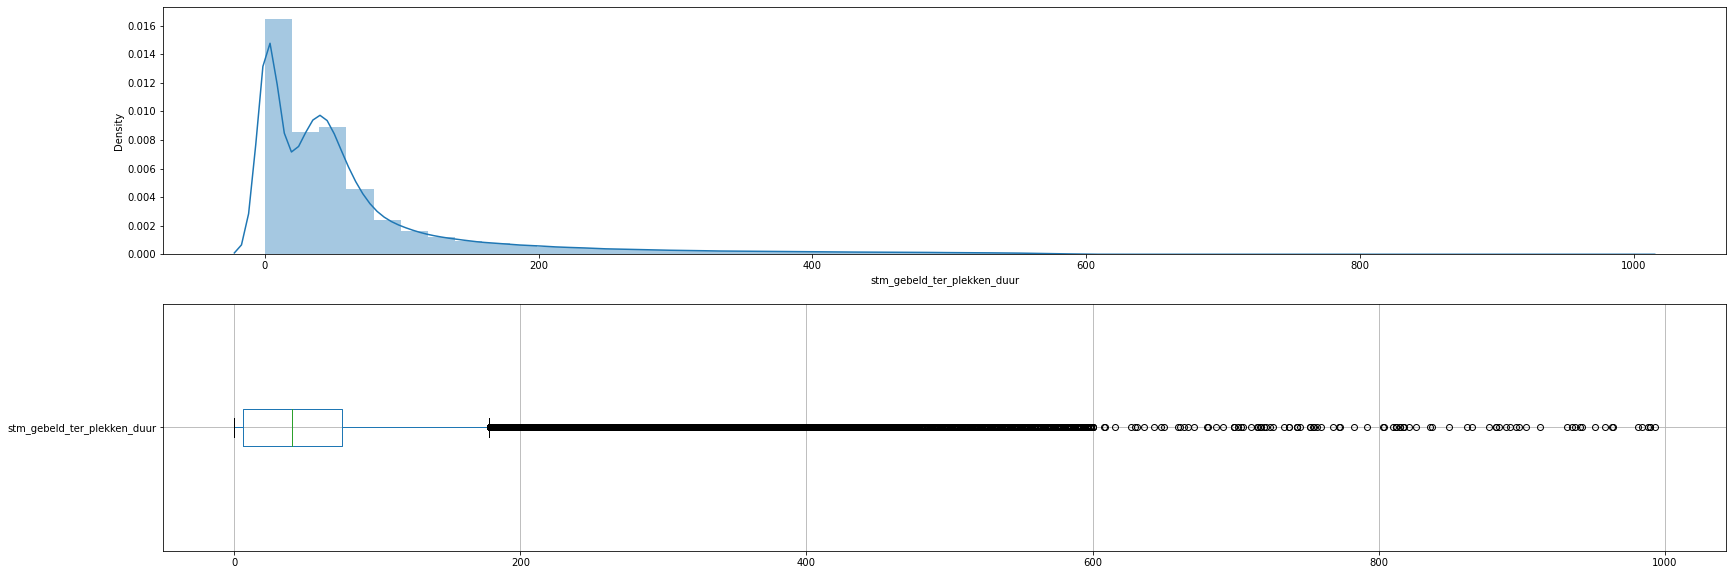

In [151]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(28, 10))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)

# 5. Targetvariabele: Functie hersteltijd

Onze targetvariabele is om de Functiehersteltijd te voorspellen. We willen graag kunnen voorspellen wanneer een gemelde storing voorbij is, wat ook wel functieherstel wordt genoemd.  

##### 5.1 Overzicht functie hersteltijd duur

We kiezen ervoor om als targetvariable de stm_fh_duur te nemen. Dat is de duur in minuten tussen de melding van de storing tot het functieherstel. We willen op die manier een totalen duur kunnen voorspelen voor de eind gebruiker.


In [152]:
table['stm_fh_duur'].head()

2    51.0
3    40.0
4     6.0
5     7.0
6    13.0
Name: stm_fh_duur, dtype: float64

##### 5.2 Verdeling functie hersteltijd duur

Hier onder geven we de verdeling weer van functie herstel duur. Er is te zien dat de duur niet normaal verdeeld is maar dat er spraken is van een rechts scheve verdeling. <br> Daarnaast zien we dat de duur een x aantal uitschieters heeft, deze uitschieters houden we in de data set omdat deze wat zeggen over de soort storing en uitloop tijden.

<AxesSubplot:>

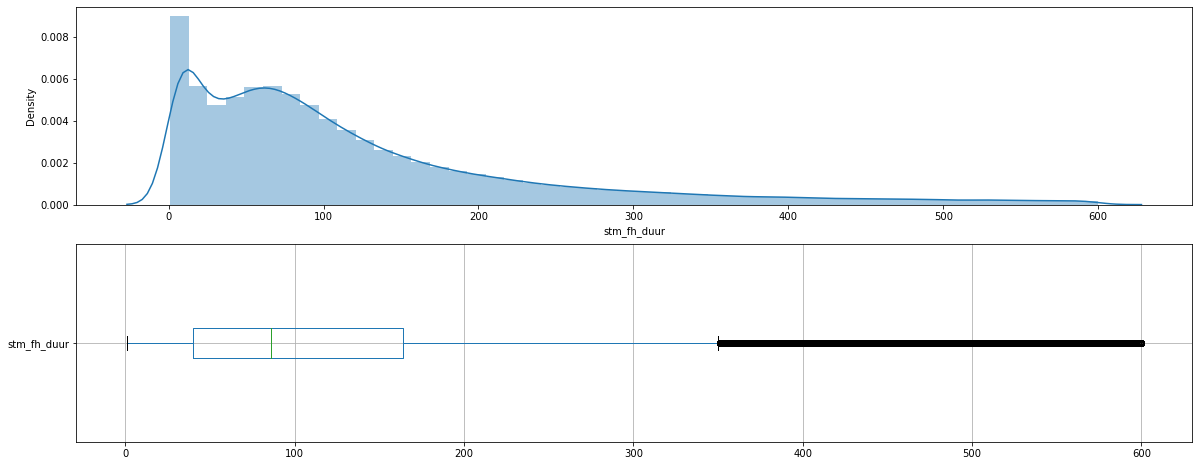

In [153]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_fh_duur, ax = ax1)
table.boxplot(['stm_fh_duur'], ax = ax2, vert=False)

# 6. Feature variabele Discrete en Continu

#### 6.1 Overzicht discreete en ratio feature variabele

Hier hebben we een duidelijk overzicht van de mogelijke continu en discrete features .

In [154]:
table.loc[:, table.dtypes == float].sample(3)

,stm_km_van_mld,stm_km_tot_mld,stm_km_van_gst,stm_km_tot_gst,stm_progfh_in_duur,stm_progfh_gw_teller,stm_fh_duur,stm_reactie_duur,stm_meld_gebeld_duur,stm_meld_ter_plekken_duur,stm_gebeld_ter_plekken_duur
485081,0.0,0.0,0.0,0.0,19.0,1.0,69.0,50.0,0.0,50.0,50.0
420297,39931.0,0.0,39931.0,0.0,474.0,0.0,448.0,5.0,0.0,5.0,5.0
637005,813184.0,0.0,0.0,0.0,0.0,0.0,143.0,143.0,0.0,143.0,143.0


Hier onder tonen wat op eerste gezicht een correlatie zal hebben met functie hersteltijd duur. Wat op valt is dat de prognose duur een negatieve correlatie heeft met de functie hertstel tijd van -19%. Daarnaast is er nog 1 kolom  die een zwakke correlatie heeft: prognose teller ~10%.

In [155]:
corr_sample = table.corr()
corr_sample['stm_fh_duur'].sort_values()

stm_progfh_in_duur            -0.194019
stm_tao_telling_mutatie       -0.020679
stm_reactie_duur              -0.013610
#stm_sap_meldnr               -0.008316
stm_meld_gebeld_duur           0.001787
stm_km_van_mld                 0.008044
stm_km_van_gst                 0.022270
stm_km_tot_gst                 0.028999
stm_km_tot_mld                 0.029047
stm_progfh_gw_teller           0.111273
stm_meld_ter_plekken_duur      0.203990
stm_gebeld_ter_plekken_duur    0.769439
stm_fh_duur                    1.000000
Name: stm_fh_duur, dtype: float64

#### 6.2 Functie herstel prognose 

Hier onder vergelijken we de prognose duur en uiteindelijke duur met elkaar. <br> Er is op te merken dat de prognose soms precies klopt en soms ver van de echte functie herstel duur ligt.

In [156]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].sample(5, random_state=2)

,stm_progfh_in_duur,stm_fh_duur
360881,4.0,6.0
346361,160.0,172.0
235162,99.0,275.0
469704,99999999.0,200.0
802170,0.0,16.0


In [157]:
table['stm_progfh_in_duur'].describe()

count    3.642230e+05
mean     1.892549e+07
std      3.934666e+07
min      0.000000e+00
25%      2.700000e+01
50%      6.500000e+01
75%      2.830000e+02
max      1.060092e+09
Name: stm_progfh_in_duur, dtype: float64

Er is op te merken dat er voorspellingen tussen zitten van 999999 minuten. Zoals hier onder te zien is zal dit het gemiddelde en de verdeling erg aanpassen  

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

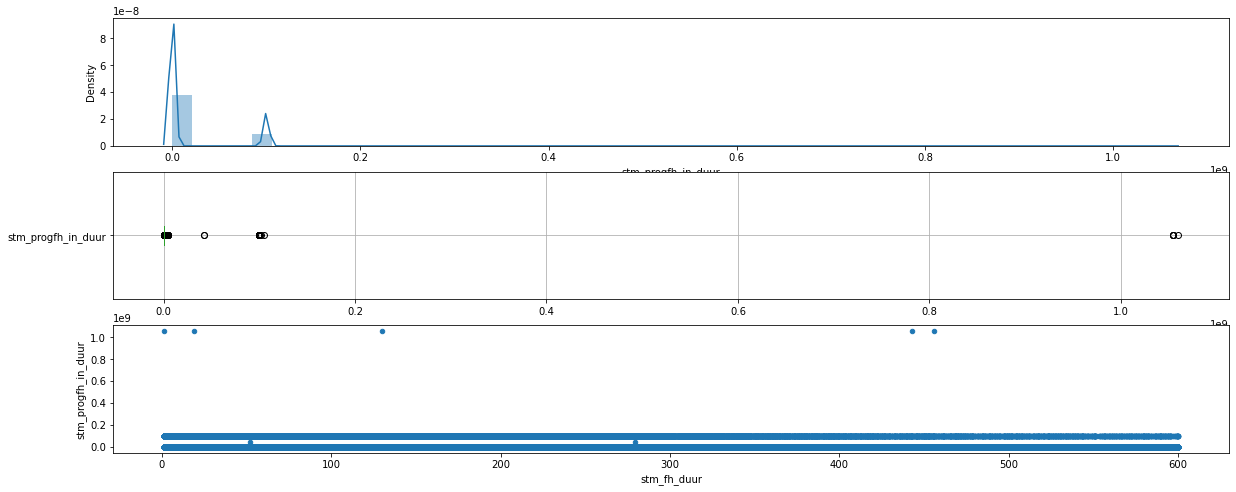

In [158]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax3)

Voor verder onderzoek halen we de 999999 waardes uit de data 

In [159]:
table = table[table['stm_progfh_in_duur'] < 999999]
table.shape

(295320, 37)

Na verder onderzoek is er hier onder te zien dat prognoses boven 900 steeds meer afdwaalt van de uiteindelijke functie herstel tijd. Er kan dus gezegt worden dat prognoses boven de 900 niet relevant zijn voor het model.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

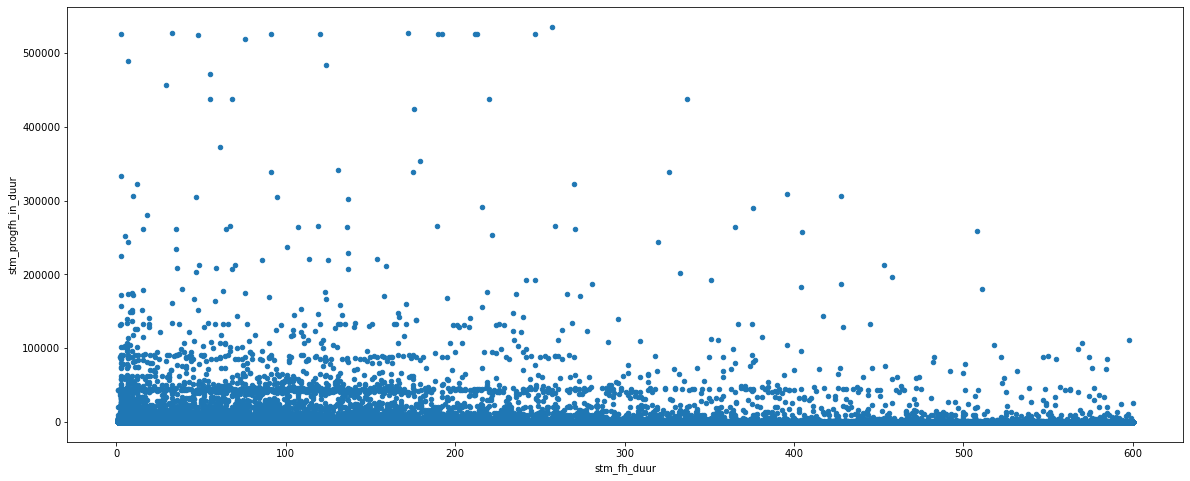

In [160]:
fig, (ax1)= plt.subplots(1,1, figsize=(20, 8))
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax1)

In [161]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  >= 900].sample(4)

,stm_progfh_in_duur,stm_fh_duur
167146,30663.0,424.0
685346,40710.0,107.0
893614,1705.0,260.0
398483,1260.0,84.0


In [162]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].loc[(table['stm_progfh_in_duur'])  < 900].sample(4)

,stm_progfh_in_duur,stm_fh_duur
380418,42.0,104.0
460403,120.0,177.0
549405,215.0,242.0
289801,56.0,101.0


Voor verder onderzoek halen we hier onder de prognoses duur boven rijen boven de de 900 uit de dataset

In [163]:
 table = table[table['stm_progfh_in_duur'] <= 900]

In [164]:
table.shape

(286057, 37)

Er is hieronder nu een beter verdeling te zien van prognoses duur. De uitschieters die nu nog in de data zitten zijn relevant voor het bepalen waar een storing soort langer duurt dan prognose.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_in_duur'>

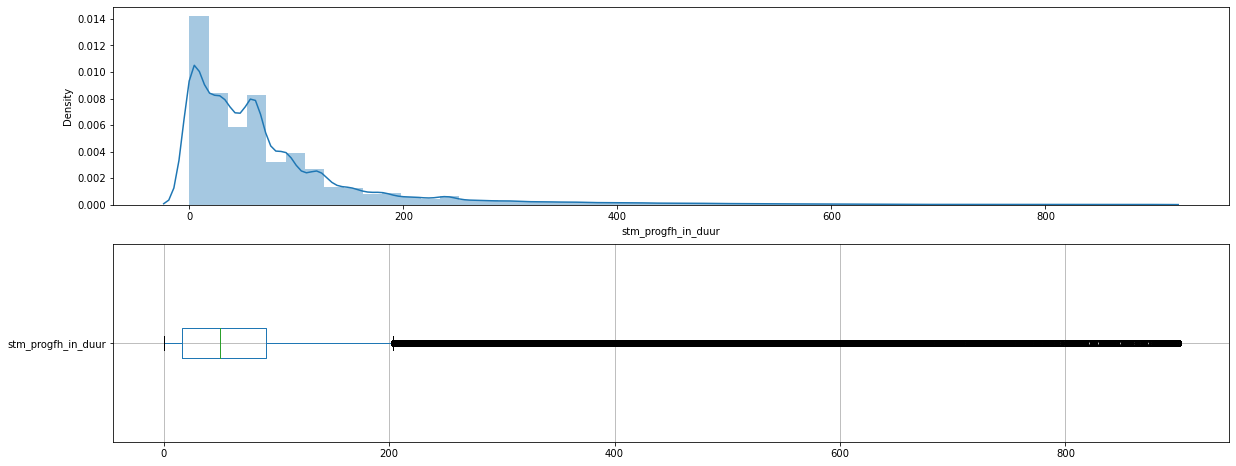

In [165]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(20, 8))
sns.distplot(table.stm_progfh_in_duur, ax = ax1)
table.boxplot(['stm_progfh_in_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_progfh_in_duur', ax = ax3)

Er is uit de correlatie hier onder te zien dat zonder de verwaarloosde data. de corrolatie naar 43% is.

In [166]:
table[['stm_progfh_in_duur', 'stm_fh_duur']].corr()

,stm_progfh_in_duur,stm_fh_duur
stm_progfh_in_duur,1.000000,0.432908
stm_fh_duur,0.432908,1.000000


#### 6.3 Prognose teller

We gaan hier verder onderzoek dan naar de prognose teller. Er is een kleine 7% corrolatie tussen prognose teller en functie herstel duur.

In [167]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

,stm_progfh_gw_teller,stm_fh_duur
stm_progfh_gw_teller,1.000000,0.078295
stm_fh_duur,0.078295,1.000000


Er valt op dat de verschilende prognoses maar 1 item in voor komt en der geen boxplot gemaakt kan worden.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_gw_teller'>

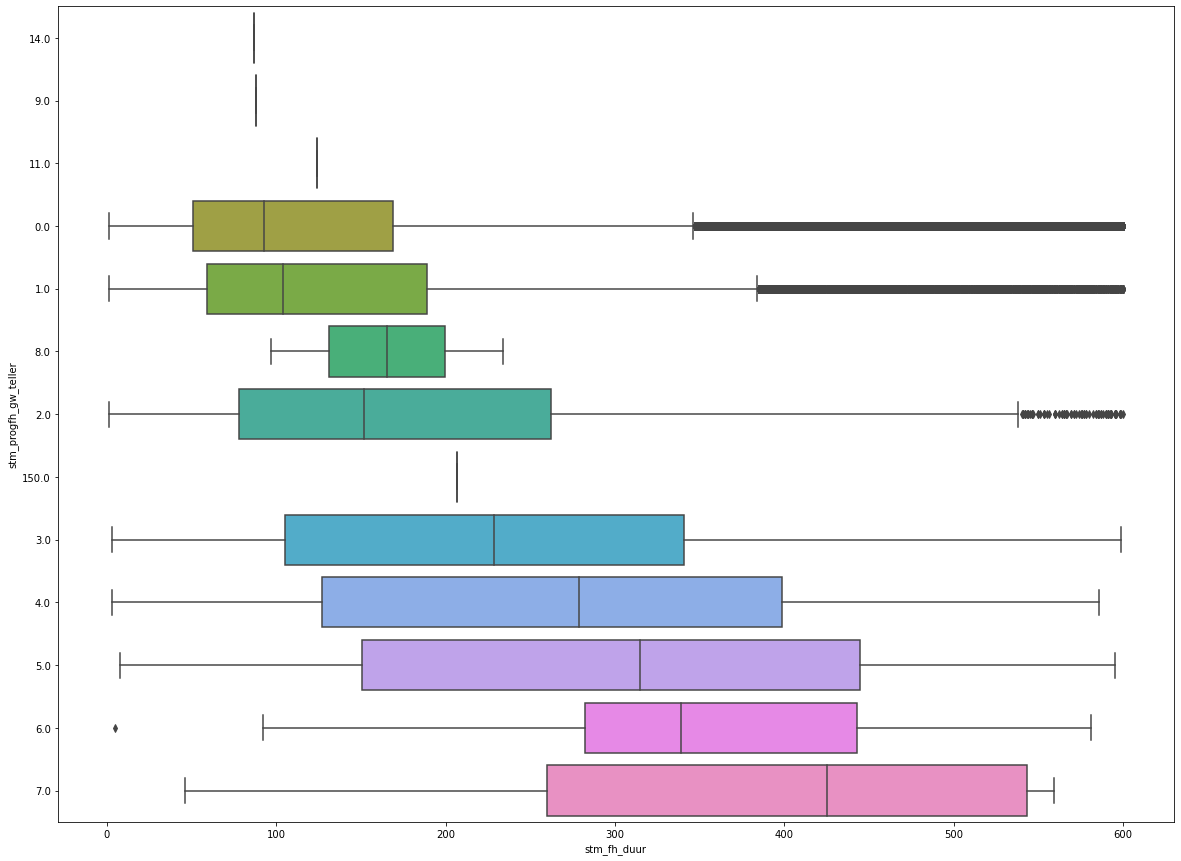

In [168]:
group_prog = table.loc[:,['stm_fh_duur', 'stm_progfh_gw_teller']].groupby(['stm_progfh_gw_teller']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_progfh_gw_teller, x=table.stm_fh_duur, order=group_prog.index, orient="h")

We halen de verschillende prognose met weinig voor komende rijen er uit.

In [169]:
table = table[table['stm_progfh_gw_teller'] != 14]
table = table[table['stm_progfh_gw_teller'] != 9]
table = table[table['stm_progfh_gw_teller'] != 11]
table = table[table['stm_progfh_gw_teller'] != 150]
table = table[table['stm_progfh_gw_teller'] != 8]

Er is te zien dat er wel een gemiddelde functie herstel tijds duur trend in zit.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_progfh_gw_teller'>

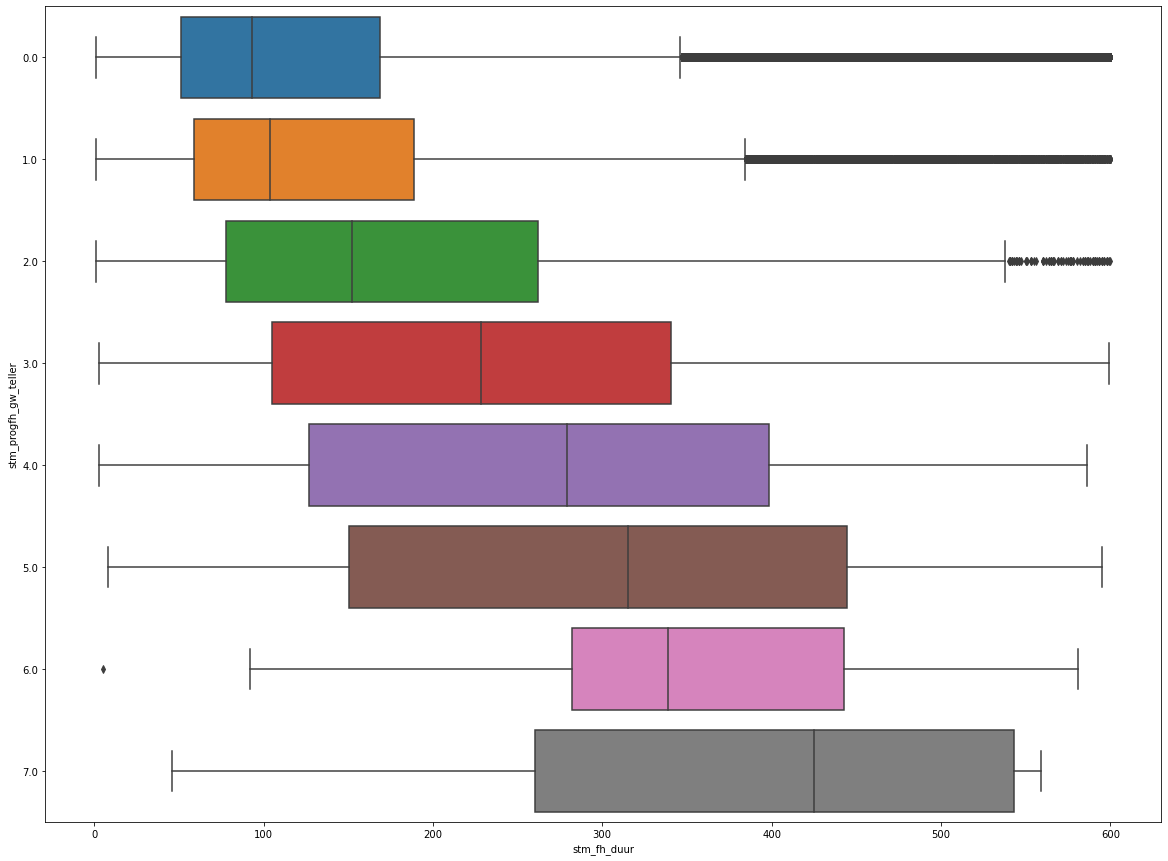

In [170]:
group_prog = table.loc[:,['stm_fh_duur', 'stm_progfh_gw_teller']].groupby(['stm_progfh_gw_teller']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_progfh_gw_teller, x=table.stm_fh_duur, order=group_prog.index, orient="h")

Op eerste gezicht lijkt dit een goede kandidaat voor een feature target. Maar zoals hier onder te zien is de data grotendeels verdeelt over teller 0 en 1. Er is ook te zien dat 0 en 1 gemiddelde naast elkaar liggen. De functie herstel tijd is hetzelfde verdeelt dus zegt het teller kolom niets over het verschil van tijds duur.

In [171]:
table['stm_progfh_gw_teller'].value_counts()

0.0    214293
1.0     65602
2.0      4908
3.0       930
4.0       236
5.0        55
6.0        17
7.0        10
Name: stm_progfh_gw_teller, dtype: int64

In [172]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

,stm_progfh_gw_teller,stm_fh_duur
stm_progfh_gw_teller,1.000000,0.088538
stm_fh_duur,0.088538,1.000000


#### 6.3 Melding ter plekken duur

We nemen hier een kijkje in meldeing ter plekken duur. dit is de tijd van af de tijd dat er gebeld is tot de tijd van aankomst van aannemer.

In [173]:
table[['stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].head(4) 

,stm_gebeld_ter_plekken_duur,stm_fh_duur
84561,0.0,7.0
86473,0.0,232.0
86882,0.0,8.0
93767,36.0,18.0


We zien dat er een kleine 8% corrolatie is.

In [174]:
table[['stm_progfh_gw_teller', 'stm_fh_duur']].corr()

,stm_progfh_gw_teller,stm_fh_duur
stm_progfh_gw_teller,1.000000,0.088538
stm_fh_duur,0.088538,1.000000


<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_gebeld_ter_plekken_duur'>

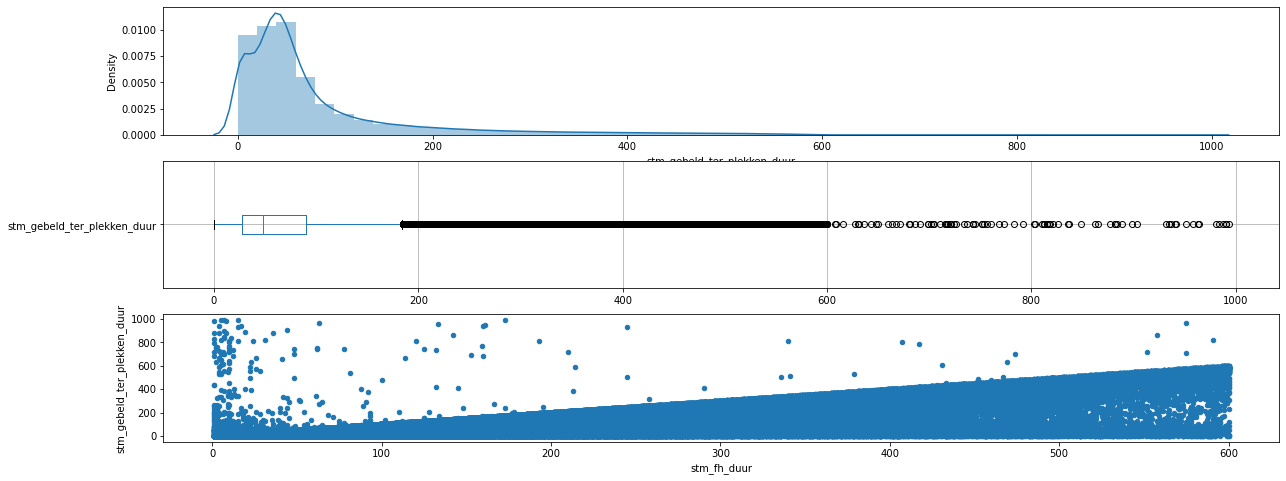

In [175]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_gebeld_ter_plekken_duur', ax = ax3)

In [177]:
table = table[table['stm_gebeld_ter_plekken_duur'] < 1000]

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_gebeld_ter_plekken_duur'>

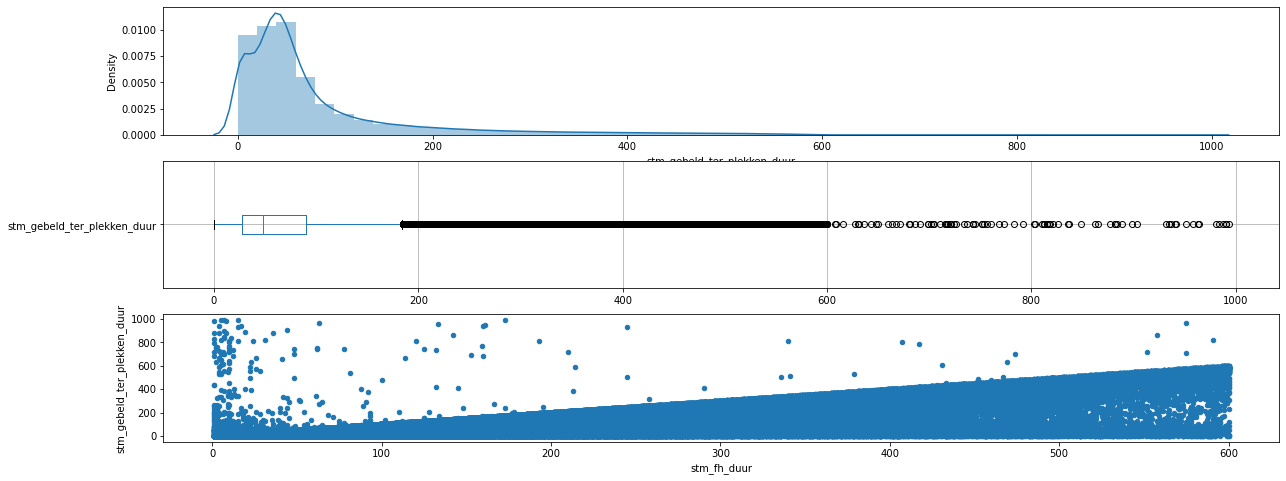

In [178]:
fig, (ax1,ax2,ax3)= plt.subplots(3,1, figsize=(20, 8))
sns.distplot(table.stm_gebeld_ter_plekken_duur, ax = ax1)
table.boxplot(['stm_gebeld_ter_plekken_duur'], ax = ax2, vert=False)
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_gebeld_ter_plekken_duur', ax = ax3)

We zien dat na het verwijderen van de tijd boven de 1000 minuten de correlatie toe neemt van 8% tot 80%

In [179]:
table[['stm_gebeld_ter_plekken_duur', 'stm_fh_duur']].corr()

,stm_gebeld_ter_plekken_duur,stm_fh_duur
stm_gebeld_ter_plekken_duur,1.000000,0.803746
stm_fh_duur,0.803746,1.000000


## 7. Feature variabele Nominaal

#### 7.1 Overzicht Nominaal variabele

Hier hebben we een duidelijk overzicht van alle nominale features   

In [180]:
table.loc[:, table.dtypes == 'category'].sample(3)

,stm_geo_mld,stm_geo_mld_uit_functiepl,stm_equipm_nr_mld,stm_equipm_soort_mld,stm_prioriteit,stm_status_melding_sap,stm_oh_pg_gst,stm_geo_gst,stm_equipm_nr_gst,stm_equipm_soort_gst,stm_oorz_groep,stm_oorz_code,stm_fh_status,stm_tao_indicator,stm_tao_beinvloedbaar_indicator,stm_contractgeb_mld,stm_functiepl_mld,stm_techn_mld,stm_contractgeb_gst,stm_techn_gst
288452,133,133.0,10282714.0,TREINBEINV,2.0,MAFS MAFD,08S,133.0,10282714.0,TREINBEINV,ONR-RIB,133.0,2.0,J,B,8.0,133-605-1000041643,S,8.0,S
157552,555,555.0,11155130.0,WISSEL,2.0,MINB PAGE,03S,555.0,11155130.0,WISSEL,TECHONV,241.0,1.0,J,B,3.0,555-302-1000117159,B,3.0,S
781539,950,950.0,10028553.0,DETJADE1SL,2.0,MINB,04S,950,10028553.0,DETJADE1SL,TECHONV,221.0,1.0,N,B,4.0,950-601-1000117054,S,4.0,S


Omdat de functie hersteltijd een niet normale verdeling heeft is het niet mogelijk om een directe relatie te berekenen tussen de categorieën en de functie hersteltijd duur. Er zijn wel technieken deze technieken zijn alleen voor de huidige opdracht tijd en kennis level niet toepasbaar voor dit project.

De nominale kolommen die in de dataset zitten hebben veel categoriale waardes. Voor de modellen is het moeilijk om hier mee over weg te gaan zonder de categorieën 1 van 1 uit te zoeken en daar dummy's van maken. Daar voor in de plaats hebben we  hier gebruik gemaakt van leave one out target encoding.

In [181]:
def give_leave_one_out_encoder(table, column):
    leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
    two_tables = table[column].copy()
    return leave_one_encoder.fit_transform(two_tables[column[0]].astype('category'), two_tables[column[1]])
    

Hier onder bekijken we een voorbeeld hoe de verandering plaats heeft gevonden met de uitkomst. De target encoding werkt als volgt: voor iedere category pak alle duur die er onder valt. Sommeer alle rijen die er onder vallen zonder de huidige rij waarde. Deel het uitkomst door het aantal rows die onder de categorie vallen. Vervolgens neem voor iedere element een standaarddeviatie afwijking van 0.05, deze afwijking wordt genomen om over fitting te voorkomen.

In [182]:
Example_table = table[['stm_oorz_groep', 'stm_fh_duur']].copy()
Example_table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(Example_table, ['stm_oorz_groep', 'stm_fh_duur'])

In [183]:
Example_table.sample(4)

,stm_oorz_groep,stm_fh_duur,stm_oorz_groep_looe_mean
806812,ONR-DERD,53.0,132.464146
283604,TECHONV,321.0,137.087116
224647,ONR-RIB,93.0,140.462150
381266,ONR-RIB,514.0,136.211597


#### 7.2 Oorzaak groep

Hier onder is te zien dat oorzaak groep heeft 4 categorien bevat, 

In [184]:
table.stm_oorz_groep.value_counts()

TECHONV     180190
ONR-DERD     59215
ONR-RIB      31410
WEER         15236
Name: stm_oorz_groep, dtype: int64

Hier onder is er te zien dat de verdeling van duur niet erg verspreid is. Het gemiddelde ligt dicht op elkaar

<AxesSubplot:title={'center':'stm_fh_duur'}, xlabel='[stm_oorz_groep]'>

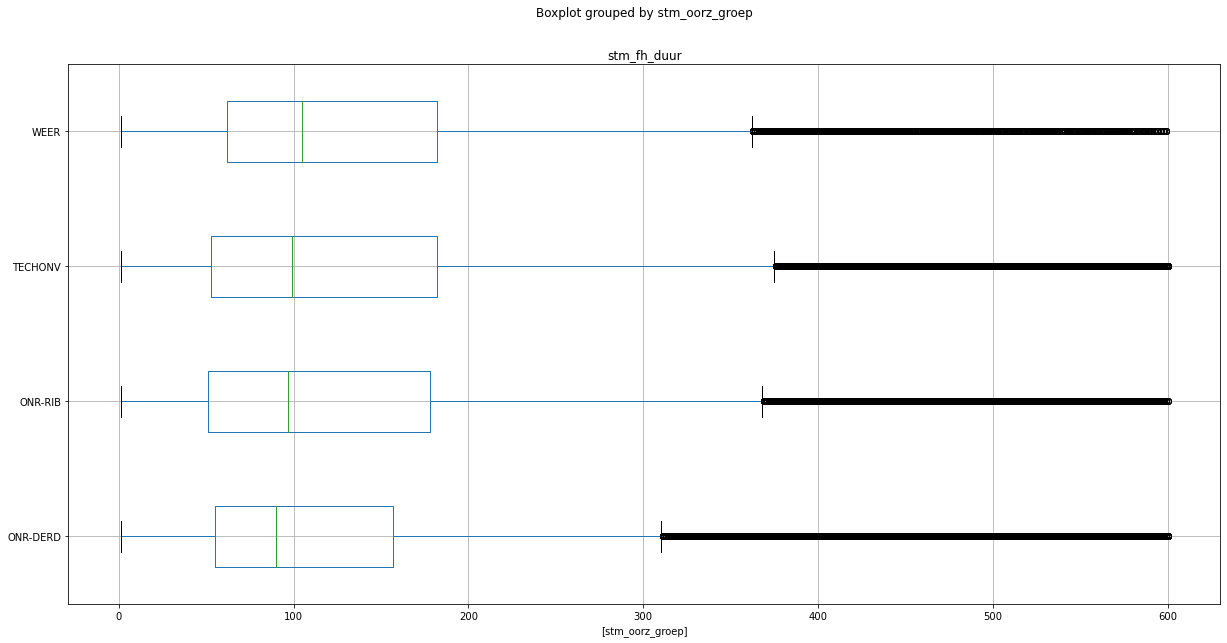

In [185]:
fig, (ax1) = plt.subplots(1,1, figsize=(20,10))
table.boxplot(column=['stm_fh_duur'], by=['stm_oorz_groep'], ax = ax1, vert=False)

In [186]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_groep']].head(5)

,stm_oorz_groep_looe_mean,stm_fh_duur,stm_oorz_groep
84561,147.884971,7.0,TECHONV
86473,118.981969,232.0,ONR-RIB
86882,146.752726,8.0,ONR-RIB
93767,130.547028,18.0,ONR-DERD
95489,134.356596,195.0,TECHONV


Zoals hierboven te zien is verschillen functie herstel waardes niet erg van elkaar. Dat was op eerste gezicht ook te zien in de box plot.. Dit zorgt dat oorzaak geen goede kandidaat is als feature

##### 7.3 Oorzaak code

We gaan oorzaak code hieronder verder onderzoeken. Er is te zien dat er meer categorieën zijn en er een betere verdeling is van functies herstel tijd duur.

In [187]:
print('Totaal: ', table['stm_oorz_code'].value_counts().count())
table['stm_oorz_code'].value_counts().head(6)

Totaal:  76


221.0    41951
218.0    34119
215.0    31953
133.0    15500
145.0    15403
135.0    14753
Name: stm_oorz_code, dtype: int64

In [188]:
table[['stm_oorz_code', 'stm_fh_duur']].head(5) 

,stm_oorz_code,stm_fh_duur
84561,299.0,7.0
86473,133.0,232.0
86882,133.0,8.0
93767,142.0,18.0
95489,215.0,195.0


Hier onder is er te zien dat elke categorie veel uitschieters bevatten dat zegt niet meteen dat dit ook echt uitschieters zijn in de gehele data maar van de onderliggende categorie. Er is te zien dat het functie herstel tijd duur van de categorieën ongeveer het zelfde gemiddelde hebben.

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_oorz_code'>

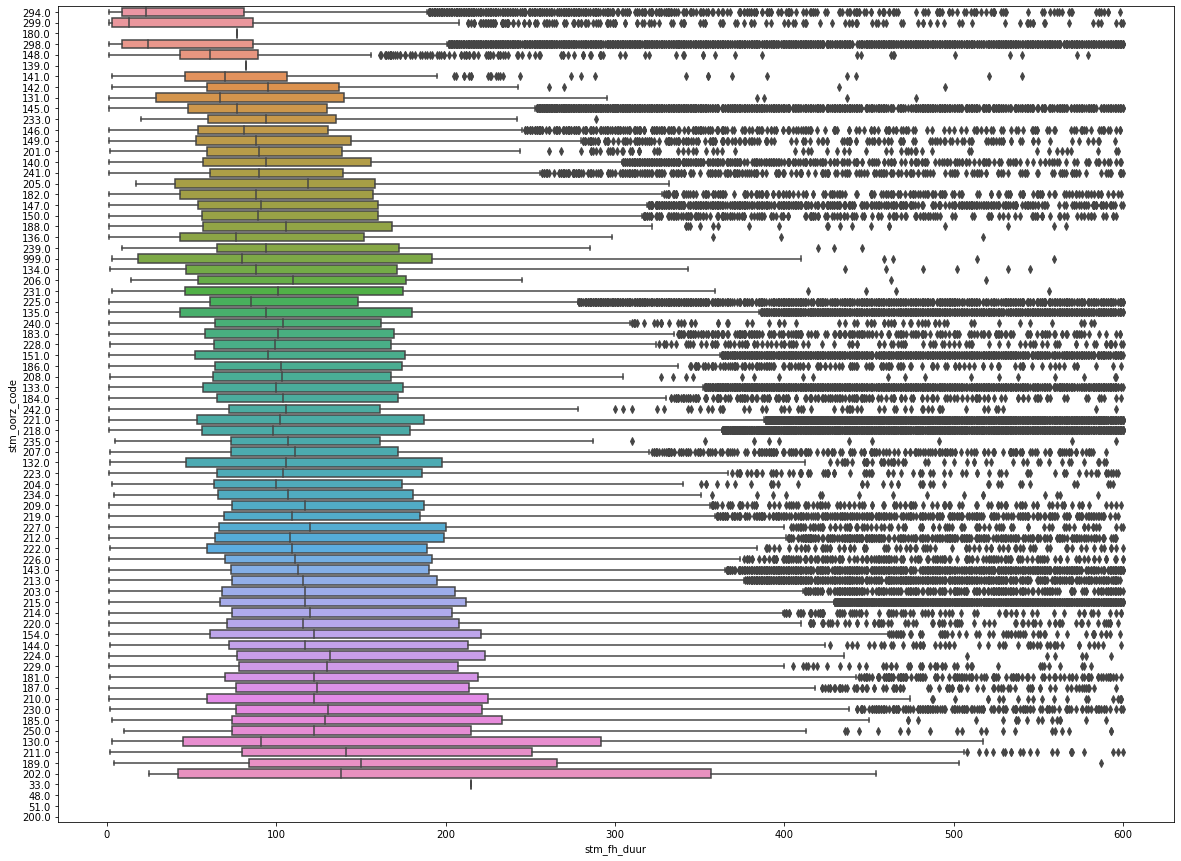

In [189]:
group_oorz = table.loc[:,['stm_fh_duur', 'stm_oorz_code']].groupby(['stm_oorz_code']).mean().sort_values(by='stm_fh_duur')
plt.figure(figsize=(20, 15))
sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

Er is hier onder een iets groter verschil te zie per categorie maar de veranding is te klein om daar nuttige informatie uit te halen

In [190]:
table['stm_oorz_groep_looe_mean'] = give_leave_one_out_encoder(table, ['stm_oorz_groep', 'stm_fh_duur'])
table[['stm_oorz_groep_looe_mean', 'stm_fh_duur', 'stm_oorz_code']].sample(4)

,stm_oorz_groep_looe_mean,stm_fh_duur,stm_oorz_code
276764,135.745881,162.0,229.0
390816,139.968669,105.0,207.0
313129,132.222667,380.0,135.0
228261,141.603626,165.0,133.0


##### 7.4  Equipment nummer

Voor iedere storing is er specifieke materialen die er nodig zijn voor de storing we nemen hier een kijken naar de verdeeling.

Hier onder bekijken we de equipment nummer. de totaal count ligt vrij hoog.

In [191]:
print('Totaal: ', table.stm_equipm_nr_mld.value_counts().count())
table.stm_equipm_nr_mld.value_counts()

Totaal:  71951


None          50837
11241228.0      655
10590754.0      634
10761152.0      570
10732491.0      534
              ...  
10600192.0        0
11320141.0        0
10136975.0        0
10251710.0        0
10288032.0        0
Name: stm_equipm_nr_mld, Length: 71951, dtype: int64

In [192]:
# group_oorz = table.loc[:,['stm_fh_duur', 'stm_equipm_nr_mld']].groupby(['stm_equipm_nr_mld']).median().sort_values(by='stm_fh_duur')
# plt.figure(figsize=(20, 15))
# sns.boxplot(y=table.stm_oorz_code, x=table.stm_fh_duur, order=group_oorz.index, orient="h")

Hier onder maken we een target encoding om te kijken waar de gemiddelde van iedere nummer ligt. Er is te zien dat het tussen 160 en 110 valt. Het verschil ligt niet erg hoog het zal daarom ook niet veel zeggen over de verdeling van functie herstel duur

In [193]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_nr_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_nr_mld'].astype('category'), table['stm_fh_duur'])

<AxesSubplot:xlabel='stm_fh_duur', ylabel='stm_equipm_nr_mld_looe_mean'>

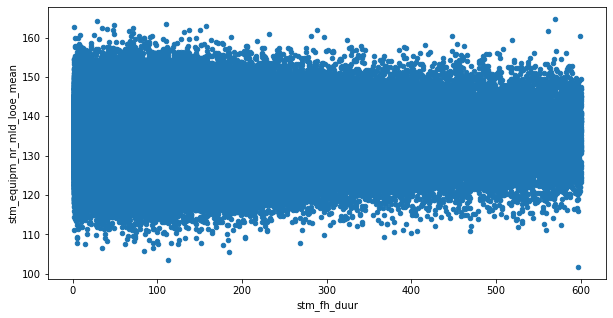

In [194]:
fig, (ax1)= plt.subplots(1,1, figsize=(10, 5))
table.plot.scatter(x = 'stm_fh_duur', y = 'stm_equipm_nr_mld_looe_mean', ax = ax1)

##### 7.5 Equipment soort

We nemen een kijken in stm_equipm_soort_mld dit zijn de verschillende soorten materialen die er nodig zijn voor de storing.

Hier onder zie we een count van het totaal aantal equipment soort categorieën.

In [195]:
table['stm_equipm_soort_mld'].value_counts().count()

442

In [196]:
table['stm_equipm_soort_mld'].value_counts().head(6)

None          50839
WISSEL        41693
OVERWEG       31776
SEIN          25341
DETGRSSSL     13537
DETECTREIN     9709
Name: stm_equipm_soort_mld, dtype: int64

Er is een redelijke verdeling te zien tussen de aantal verschillende categorieën en de aantal voorkomende rijen.

<AxesSubplot:>

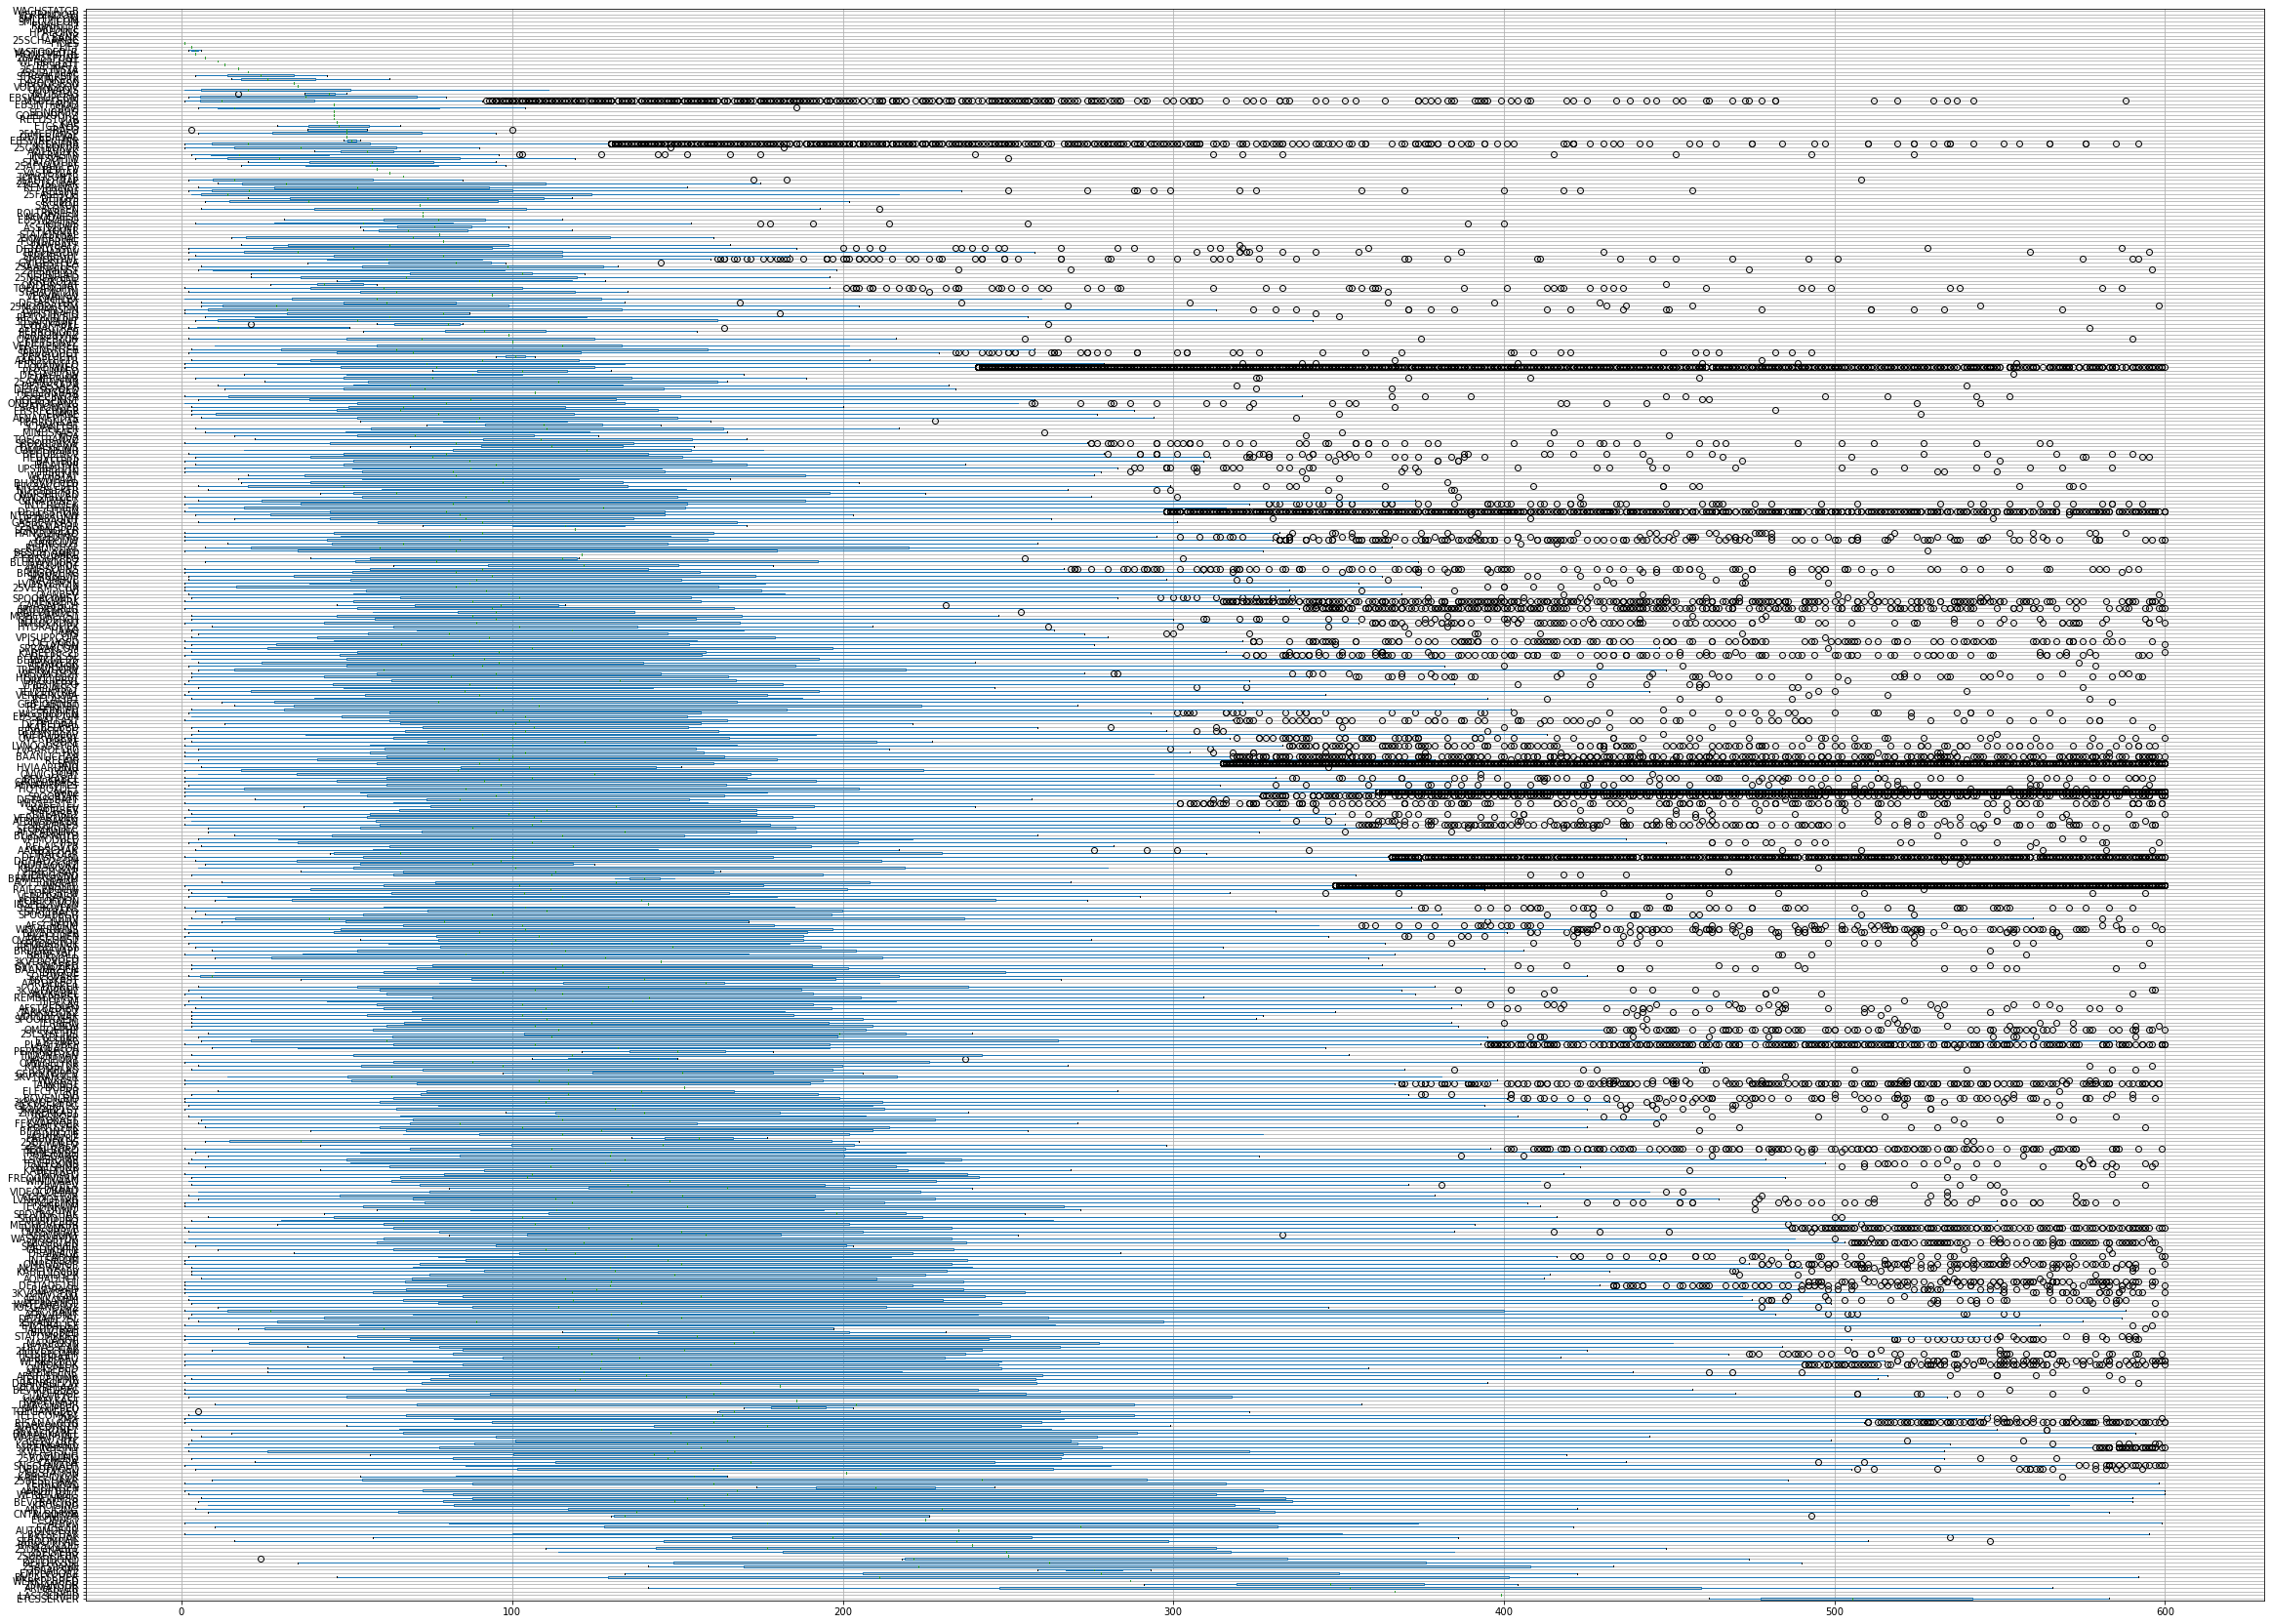

In [197]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_equipm_soort_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(40,30))
table2.boxplot(ax = ax1, vert=False)

Er valt op dat er lege waardes tussen zitten die halen we eruit voor een duidelijker beeld. Er is daar door een lichtelijke van gemiddelde van functies herstel duur toe neemt. Dit kolom zou wel wat kunnen zeggen over de functie hersteltijd.

In [198]:
value_counts = table['stm_equipm_soort_mld'].value_counts()  
table['stm_equipm_soort_mld'].replace((value_counts[value_counts <= 1].index), np.nan, inplace=True)

<AxesSubplot:>

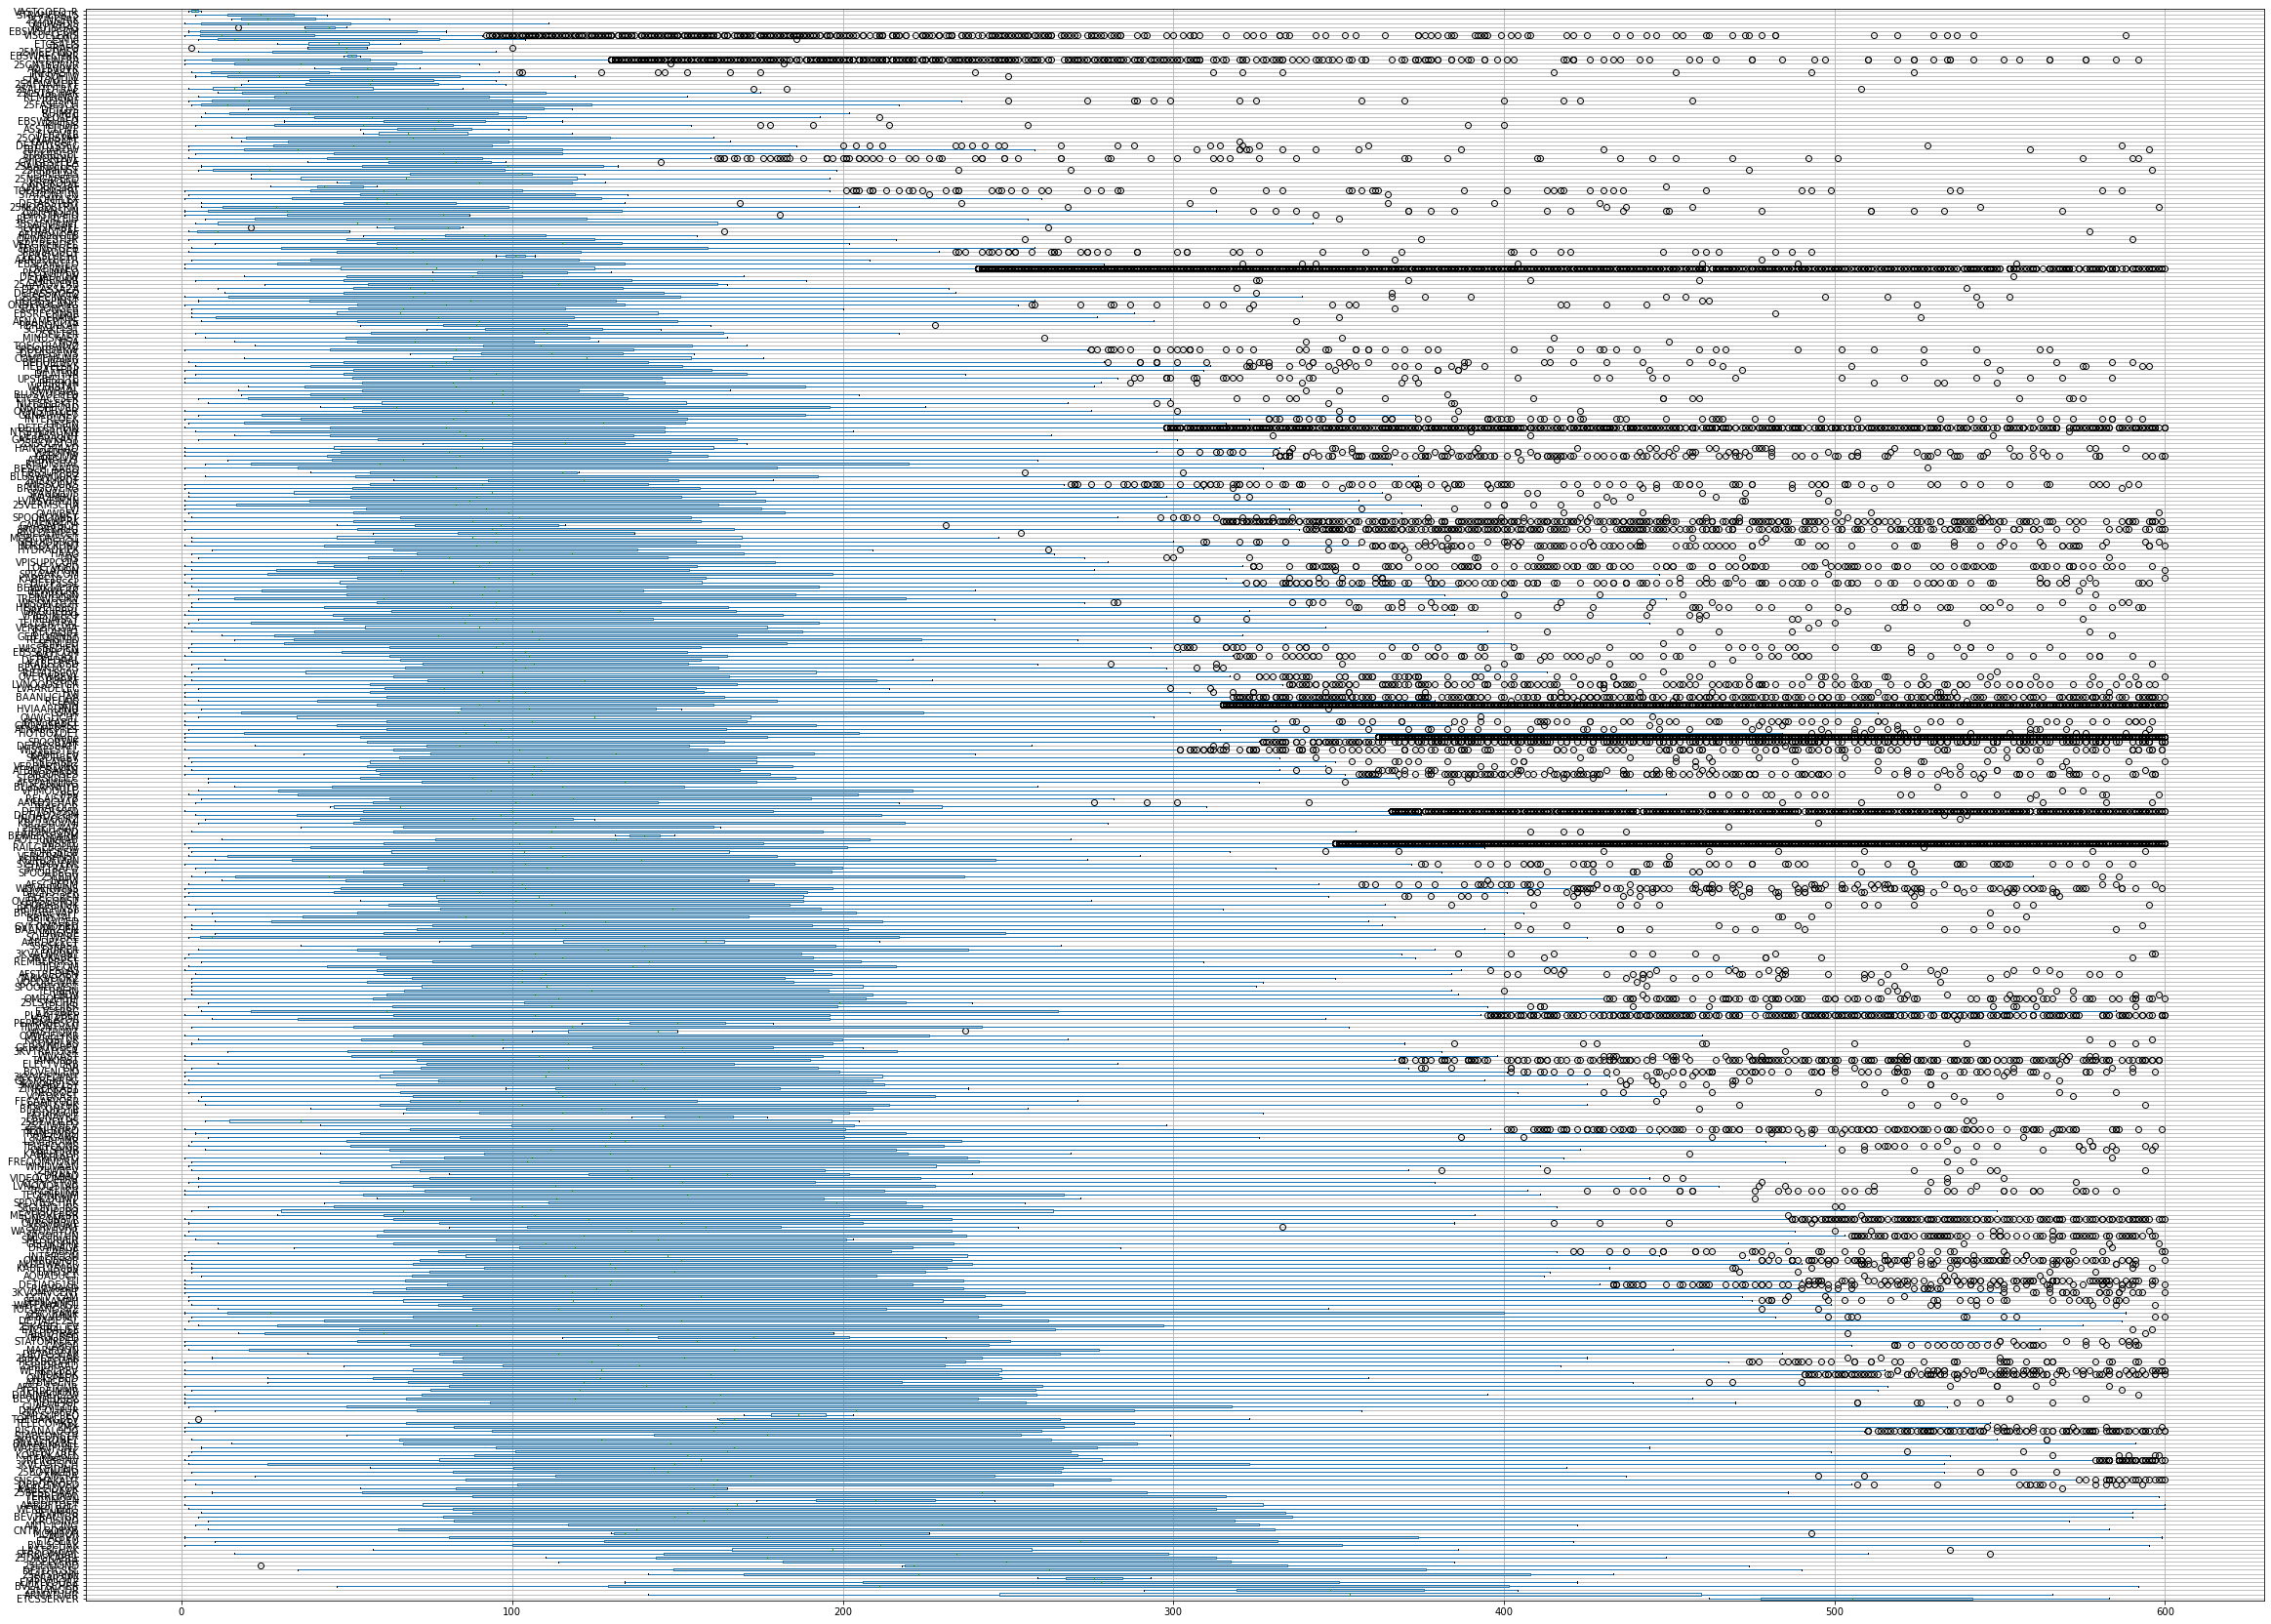

In [199]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_equipm_soort_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(40,30))
table2.boxplot(ax = ax1, vert=False)

In [200]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_equipm_soort_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_equipm_soort_mld'].astype('category'), table['stm_fh_duur'])

Er is ook op te merken dat de leave one out encoder een beter beeld geeft over de functie herstel tijd duur.

In [201]:
table[['stm_equipm_soort_mld_looe_mean', 'stm_fh_duur']].sample(5)

,stm_equipm_soort_mld_looe_mean,stm_fh_duur
573135,136.565033,454.0
675179,135.127692,121.0
565499,151.513507,127.0
173705,104.132286,61.0
479136,152.763192,27.0


#### 7.6  Prioriteit

We nemen een kijken in stm_prioriteit dit is de prioriteit van een bepaalde storing

We zien hieronder dat de prioriteit een betere verdeling heeft van functie hersteltijd. Ondanks de grote aantal uitschieters is er te zien dat de gemiddelde functie hersteltijd verschilt per prioriteit.

<AxesSubplot:>

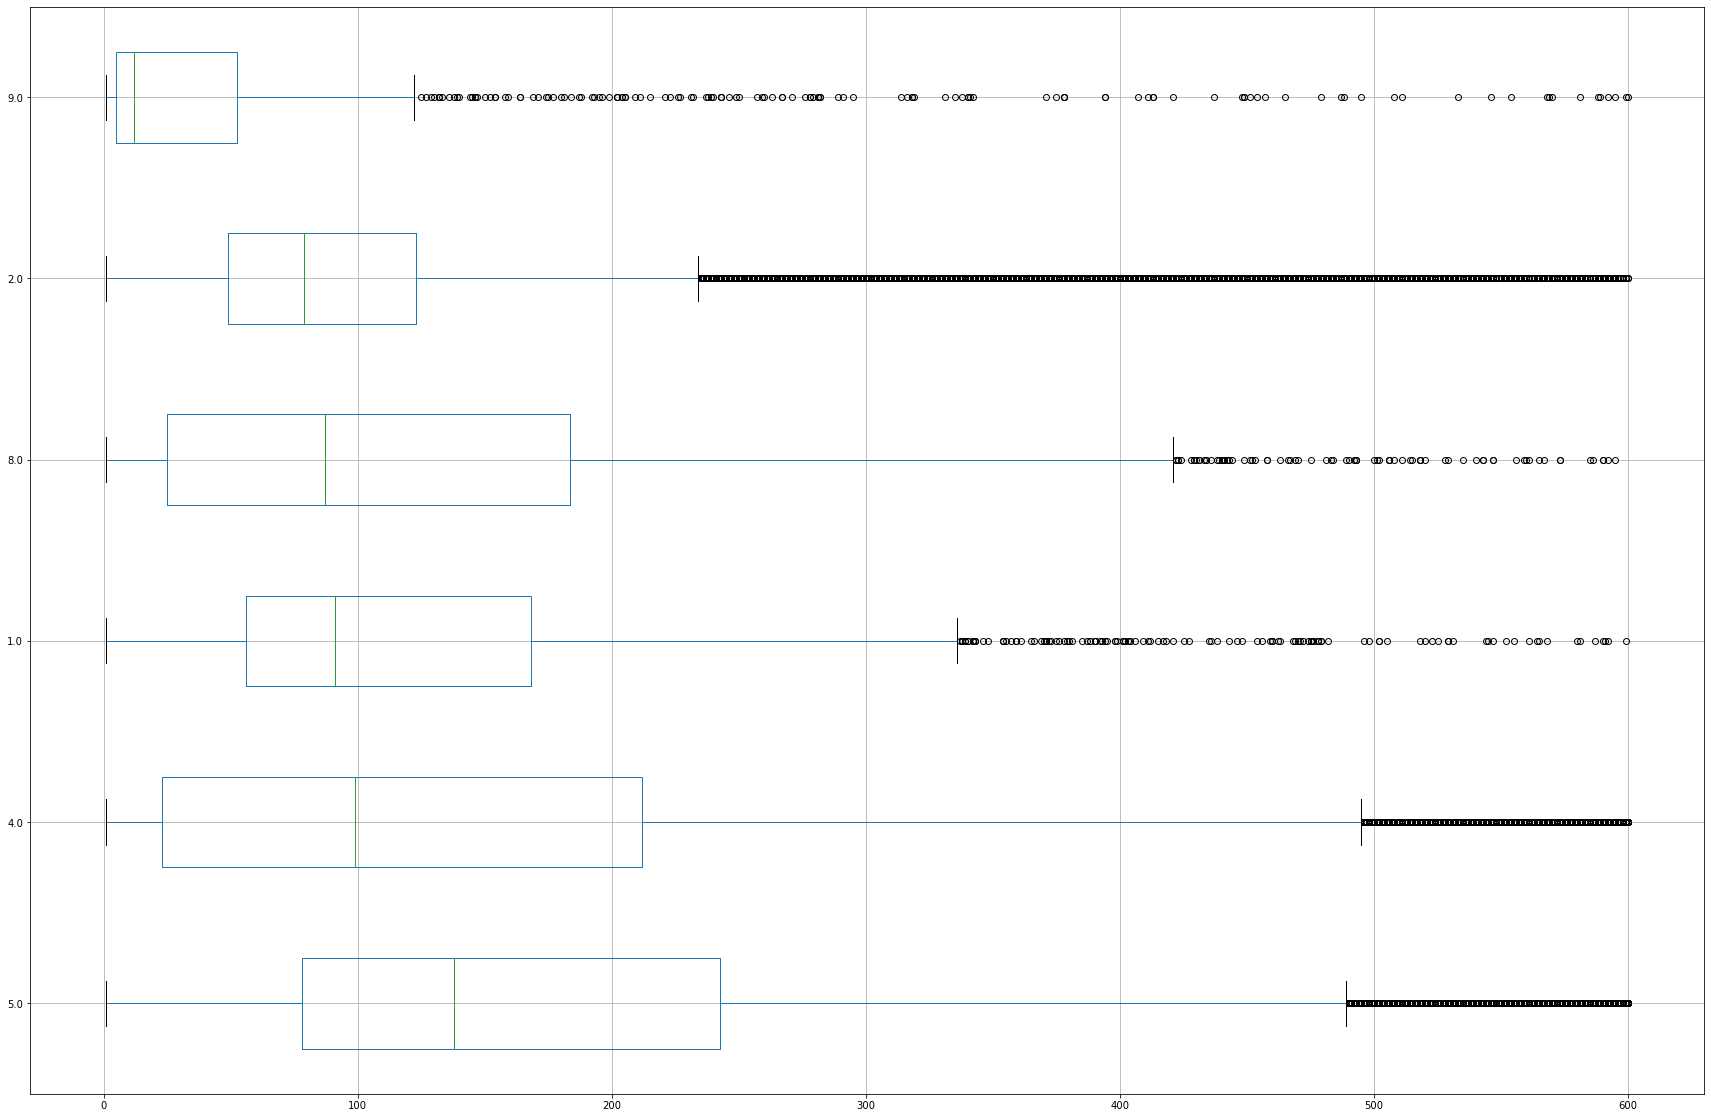

In [202]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_prioriteit"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

Er valt bij nader onder zoek te zien dat grotendeels van de data verdeelt is over 2 punten die te dicht bij elkaar liggen van gemiddelde functie herstel tijd.

In [203]:
print("Totaal: ", table.shape[0])
table['stm_prioriteit'].value_counts()

Totaal:  286051


2.0    131013
5.0    102594
4.0     47440
8.0      2299
1.0      1798
9.0       907
Name: stm_prioriteit, dtype: int64

In [204]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_prioriteit_looe_mean'] = leave_one_encoder.fit_transform(table['stm_prioriteit'].astype('category'), table['stm_fh_duur'])

Er is hier ook te zien dat de encoding niet veel zegt over de echte functie hersteltijd.

In [205]:
table[['stm_prioriteit_looe_mean', 'stm_fh_duur']].sample(5)

,stm_prioriteit_looe_mean,stm_fh_duur
184456,151.171903,235.0
401208,128.565147,69.0
213239,138.835925,81.0
345752,128.160213,88.0
737567,130.754807,153.0


#### 7.6  Techniek melding

We nemen een kijken in stm_techn_mld dit zijn de techniek soorten voor een storing.

Hier onder gaan we kijken naar de verschuilende categorieën en de functie herstel tijd verdeeling.

Er zitten wel vier categorien in "H A X M I" die een klein aantal hebben maar we zien hier verder dat de verdling van functie herstel tijd over de veschilende catagorien redelijk goed verdeelt is. 

In [206]:
print("Totaal: ", table.shape[0])
table['stm_techn_mld'].value_counts()

Totaal:  286051


S       99185
B       63500
None    50621
T       20680
E       20229
K       14564
O        9515
P        4671
G        2393
I         300
M         242
X         133
A          17
H           1
Name: stm_techn_mld, dtype: int64

<AxesSubplot:>

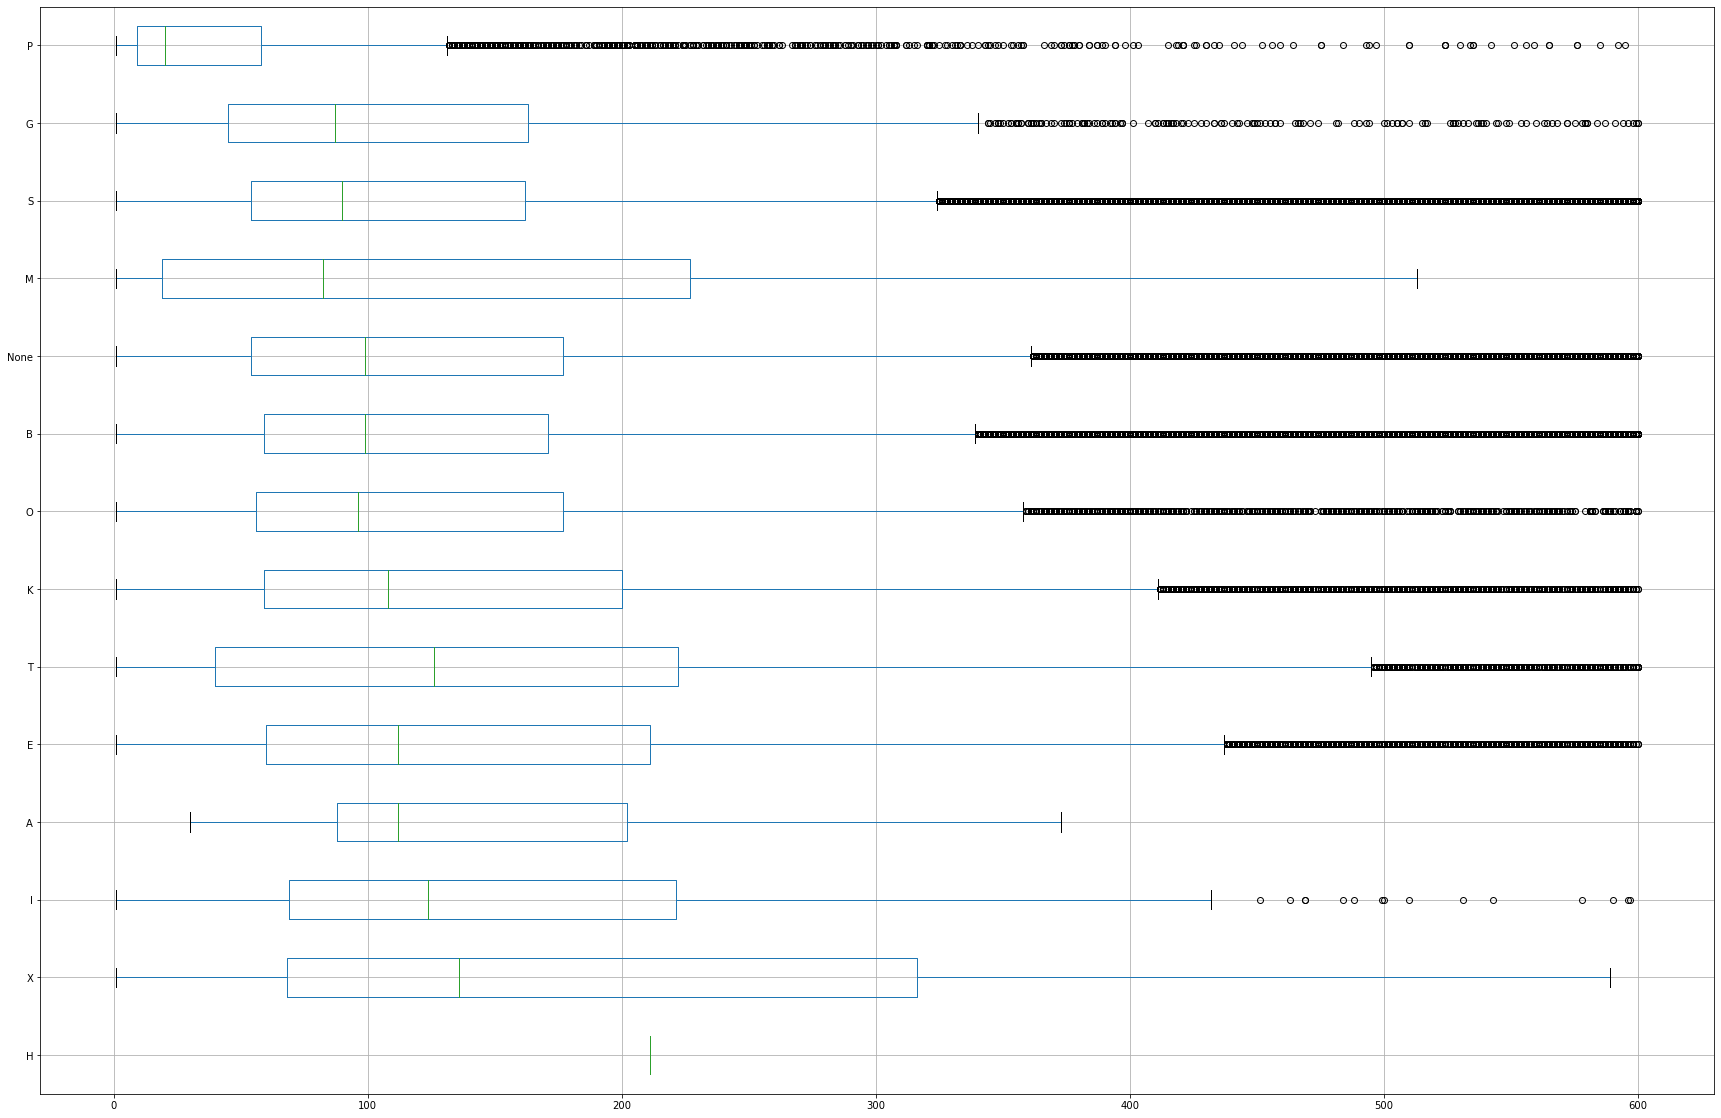

In [207]:
table2 = pd.DataFrame({col:vals['stm_fh_duur'] for col,vals in table.groupby(["stm_techn_mld"])})
meds = table2.mean()
meds.sort_values(ascending=False, inplace=True)
table2 = table2[meds.index]
fig, (ax1) = plt.subplots(1,1, figsize=(30,20))
table2.boxplot(ax = ax1, vert=False)

In [208]:
leave_one_encoder = LeaveOneOutEncoder(return_df=True, sigma=0.05)
table['stm_techn_mld_looe_mean'] = leave_one_encoder.fit_transform(table['stm_techn_mld'].astype('category'), table['stm_fh_duur'])

In [209]:
table[['stm_techn_mld_looe_mean', 'stm_fh_duur']].sample(5)

,stm_techn_mld_looe_mean,stm_fh_duur
157519,134.030279,460.0
230914,134.591840,414.0
760293,155.630761,512.0
668665,146.261485,135.0
443872,127.820537,66.0


#### 7.8 Mee genomen features

Na het onderzoek op de features die er gekozen zij met busnnis understanding en een kijk in de data zelf. Is er te zien dat er behalve de prognoses en de Melding ter plekken duur weinig features een sterke relatie of correlatie hebben met functie herstel tijd.

We nemen de vier relatief sterkste features mee in de modelen.

- 1. Techniek veld encoded
- 2. Equipment soort encoded
- 3. Prognose duur
- 4. Melding ter plekken duur